# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline


In [3]:
print(np.__version__)

2.1.0


In [4]:
from ydata_profiling import ProfileReport

# Reading The Dataset

In [5]:
data = pd.read_csv(r"D:\Jobs_after_GRAD\ALL_About_AI\ML_Interns\Elevvo_Intern\Task1-StudentScore\archive\StudentPerformanceFactors.csv")
df = pd.DataFrame(data)
df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [6]:
df.shape

(6607, 20)

# EDA

In [228]:
profile = ProfileReport(df,title="EDA Report",explorative = True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 38.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [10]:
df.describe(include="O")

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6607                6607                       6607   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3319                       3938   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6607            6607          6607            6529   
unique                3               2             3               3   
top              Medium             Yes           Low          Medium   
freq               3351            6108          2672            3925   

       School_Type Peer_Influence Learning_Disabilities  \
count         6607           6607                  6607   
unique           2              3                     2   
top         Public       Positive                    No   
freq          4598           2638                  5912   

       Parental_Education_Level Distance_from_Home Gender  
count                      6517               6540   6607  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3223               3884   3814

In [11]:
df.describe(exclude="O")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [12]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

# Notes On Dataset to be Cleaned


In [13]:
# There are nulls in [Distance_from_Home 67, Teacher_Quality 78, Parental_Education_Level 90]
# To be Bool [Extracurricular_Activities, Internet_Access, Learning_Disabilities]
# To be  float [Hours_Studied, Sleep_Hours, Previous_Scores, Exam_Score ]
# There are no duplicates
# There are some outliers

# Data Cleaning
1.   Adjust Columns names
2.   Adjust Columns Type
3.   Drop redundant Columns
4.   Remove Duplicates

## Adjust Columns Types

### Columns to be float

In [14]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [15]:
#[Hours_Studied, Sleep_Hours, Previous_Scores, Exam_Score ]
df['Hours_Studied'] = df['Hours_Studied'].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   float64
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   object 
 3   Access_to_Resources         6607 non-null   object 
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   object 
 8   Internet_Access             6607 non-null   object 
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   object 
 11  Teacher_Quality             6529 non-null   object 
 12  School_Type                 6607 non-null   object 
 13  Peer_Influence              6607 

In [17]:
#[Hours_Studied, Sleep_Hours, Previous_Scores, Exam_Score ]
df['Sleep_Hours'] = df['Sleep_Hours'].astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   float64
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   object 
 3   Access_to_Resources         6607 non-null   object 
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6607 non-null   float64
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   object 
 8   Internet_Access             6607 non-null   object 
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   object 
 11  Teacher_Quality             6529 non-null   object 
 12  School_Type                 6607 non-null   object 
 13  Peer_Influence              6607 

In [19]:
#[Hours_Studied, Sleep_Hours, Previous_Scores, Exam_Score ]
df['Previous_Scores'] = df['Previous_Scores'].astype('float')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   float64
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   object 
 3   Access_to_Resources         6607 non-null   object 
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6607 non-null   float64
 6   Previous_Scores             6607 non-null   float64
 7   Motivation_Level            6607 non-null   object 
 8   Internet_Access             6607 non-null   object 
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   object 
 11  Teacher_Quality             6529 non-null   object 
 12  School_Type                 6607 non-null   object 
 13  Peer_Influence              6607 

In [21]:
#[Hours_Studied, Sleep_Hours, Previous_Scores, Exam_Score ]
df['Exam_Score'] = df['Exam_Score'].astype('float')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   float64
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   object 
 3   Access_to_Resources         6607 non-null   object 
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6607 non-null   float64
 6   Previous_Scores             6607 non-null   float64
 7   Motivation_Level            6607 non-null   object 
 8   Internet_Access             6607 non-null   object 
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   object 
 11  Teacher_Quality             6529 non-null   object 
 12  School_Type                 6607 non-null   object 
 13  Peer_Influence              6607 

### Columns to be bool

In [23]:
df.describe(include="O")

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6607                6607                       6607   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3319                       3938   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6607            6607          6607            6529   
unique                3               2             3               3   
top              Medium             Yes           Low          Medium   
freq               3351            6108          2672            3925   

       School_Type Peer_Influence Learning_Disabilities  \
count         6607           6607                  6607   
unique           2              3                     2   
top         Public       Positive                    No   
freq          4598           2638                  5912   

       Parental_Education_Level Distance_from_Home Gender  
count                      6517               6540   6607  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3223               3884   3814

#### Woking with Extracurricular_Activities (replacing its values by True/False and Changing Its Type to be bool )

In [24]:
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].apply(lambda x : True if x == "Yes" else x == False)

In [25]:
df["Extracurricular_Activities"].unique()

array([False,  True])

In [26]:
df["Extracurricular_Activities"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Extracurricular_Activities
Non-Null Count  Dtype
--------------  -----
6607 non-null   bool 
dtypes: bool(1)
memory usage: 6.6 KB


#### Woking with Internet_Access (replacing its values by True/False and Changing Its Type to be bool )

In [27]:
df["Internet_Access"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Internet_Access
Non-Null Count  Dtype 
--------------  ----- 
6607 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB


In [28]:
df["Internet_Access"].replace({"Yes" : True , "No": False}, inplace=True)

C:\Users\AL-4qqan\AppData\Local\Temp\ipykernel_8488\2643751485.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Internet_Access"].replace({"Yes" : True , "No": False}, inplace=True)


In [29]:
df["Internet_Access"].unique()

array([True, False], dtype=object)

In [30]:
df["Internet_Access"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Internet_Access
Non-Null Count  Dtype 
--------------  ----- 
6607 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB


#### Woking with Learning_Disabilities (replacing its values by True/False and Changing Its Type to be bool )

In [31]:
df["Learning_Disabilities"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Learning_Disabilities
Non-Null Count  Dtype 
--------------  ----- 
6607 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB


In [32]:
df['Learning_Disabilities'].replace({"Yes":True , "No":False},inplace= True)

C:\Users\AL-4qqan\AppData\Local\Temp\ipykernel_8488\2893703810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Learning_Disabilities'].replace({"Yes":True , "No":False},inplace= True)


In [33]:
df["Learning_Disabilities"].unique()

array([False, True], dtype=object)

In [34]:
df["Learning_Disabilities"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Learning_Disabilities
Non-Null Count  Dtype 
--------------  ----- 
6607 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB


In [35]:
df.describe(include="O")

Parental_Involvement Access_to_Resources Motivation_Level  \
count                  6607                6607             6607   
unique                    3                   3                3   
top                  Medium              Medium           Medium   
freq                   3362                3319             3351   

       Internet_Access Family_Income Teacher_Quality School_Type  \
count             6607          6607            6529        6607   
unique               2             3               3           2   
top               True           Low          Medium      Public   
freq              6108          2672            3925        4598   

       Peer_Influence Learning_Disabilities Parental_Education_Level  \
count            6607                  6607                     6517   
unique              3                     2                        3   
top          Positive                 False              High School   
freq             2638                  5912                     3223   

       Distance_from_Home Gender  
count                6540   6607  
unique                  3      2  
top                  Near   Male  
freq                 3884   3814

In [36]:
df.describe(include="bool")

Extracurricular_Activities
count                        6607
unique                          2
top                          True
freq                         3938

## Drop Redundant Columns

In [37]:
numerical_col = df.select_dtypes(include="number")
numerical_col

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
0              23.0          84          7.0             73.0   
1              19.0          64          8.0             59.0   
2              24.0          98          7.0             91.0   
3              29.0          89          8.0             98.0   
4              19.0          92          6.0             65.0   
...             ...         ...          ...              ...   
6602           25.0          69          7.0             76.0   
6603           23.0          76          8.0             81.0   
6604           20.0          90          6.0             65.0   
6605           10.0          86          6.0             91.0   
6606           15.0          67          9.0             94.0   

      Tutoring_Sessions  Physical_Activity  Exam_Score  
0                     0                  3        67.0  
1                     2                  4        61.0  
2                     2                  4        74.0  
3                     1                  4        71.0  
4                     3                  4        70.0  
...                 ...                ...         ...  
6602                  1                  2        68.0  
6603                  3                  2        69.0  
6604                  3                  2        68.0  
6605                  2                  3        68.0  
6606                  0                  4        64.0  

[6607 rows x 7 columns]

<Axes: >

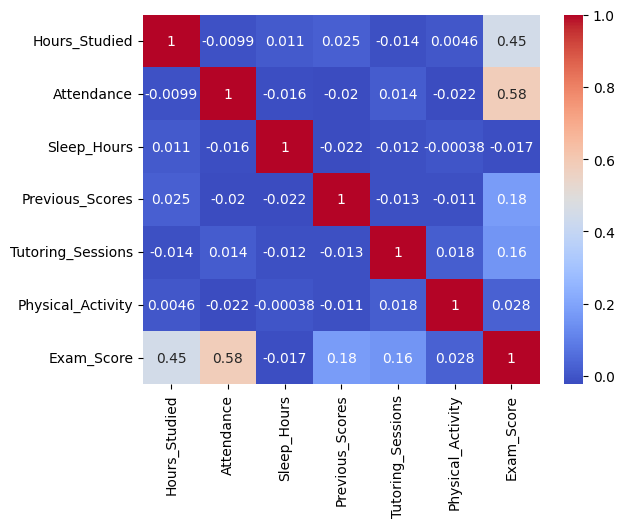

In [38]:
corr=numerical_col.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

## Remove Duplicates

In [39]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6602    False
6603    False
6604    False
6605    False
6606    False
Length: 6607, dtype: bool

In [40]:
df[df.duplicated()]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [41]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

## Dropping Nulls

In [42]:
all_null_rows = df.isnull().all(axis=1)

In [43]:
#Checking if there is a row contains no data when null value exists in this column
df[df['Teacher_Quality'].isnull() & all_null_rows]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [44]:
df.dropna(subset=['Teacher_Quality'], inplace=True)

In [45]:
df['Teacher_Quality'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [46]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality                0
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      86
Distance_from_Home            65
Gender                         0
Exam_Score                     0
dtype: int64

In [47]:
#Checking if there is a row contains no data when null value exists in this column
df[df['Parental_Education_Level'].isnull() & all_null_rows]

C:\Users\AL-4qqan\AppData\Local\Temp\ipykernel_8488\2767128699.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Parental_Education_Level'].isnull() & all_null_rows]


Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [48]:
df.dropna(subset=['Parental_Education_Level'], inplace=True)

In [49]:
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate'], dtype=object)

In [50]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality                0
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level       0
Distance_from_Home            65
Gender                         0
Exam_Score                     0
dtype: int64

In [51]:
#Checking if there is a row contains no data when null value exists in this column
df[df['Distance_from_Home'].isnull() & all_null_rows]

C:\Users\AL-4qqan\AppData\Local\Temp\ipykernel_8488\2132925215.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Distance_from_Home'].isnull() & all_null_rows]


Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [52]:
df.dropna(subset=['Distance_from_Home'], inplace=True)

In [53]:
df['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far'], dtype=object)

In [54]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6378 non-null   float64
 1   Attendance                  6378 non-null   int64  
 2   Parental_Involvement        6378 non-null   object 
 3   Access_to_Resources         6378 non-null   object 
 4   Extracurricular_Activities  6378 non-null   bool   
 5   Sleep_Hours                 6378 non-null   float64
 6   Previous_Scores             6378 non-null   float64
 7   Motivation_Level            6378 non-null   object 
 8   Internet_Access             6378 non-null   object 
 9   Tutoring_Sessions           6378 non-null   int64  
 10  Family_Income               6378 non-null   object 
 11  Teacher_Quality             6378 non-null   object 
 12  School_Type                 6378 non-null   object 
 13  Peer_Influence              6378 non-n

## Dealing with outliers

### Exam Score col

In [56]:
IQR = df['Exam_Score'].quantile(0.75) - df['Exam_Score'].quantile(0.25)
print("IQR:", IQR)

IQR: 4.0


In [57]:
Lower_bound = df['Exam_Score'].quantile(0.25) - 1.5 * IQR
print("Lower Bound:", Lower_bound)

Lower Bound: 59.0


In [58]:
Upper_bound = df['Exam_Score'].quantile(0.75) + 1.5 * IQR
print("Upper Bound:", Upper_bound)

Upper Bound: 75.0


In [59]:
df[df['Exam_Score'] < 55]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [60]:
# replace all values below the lower bound with the lower bound value
df.loc[df['Exam_Score'] < Lower_bound, 'Exam_Score'] = Lower_bound

In [61]:
df[df['Exam_Score'] > Upper_bound].info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 94 to 6566
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               76 non-null     float64
 1   Attendance                  76 non-null     int64  
 2   Parental_Involvement        76 non-null     object 
 3   Access_to_Resources         76 non-null     object 
 4   Extracurricular_Activities  76 non-null     bool   
 5   Sleep_Hours                 76 non-null     float64
 6   Previous_Scores             76 non-null     float64
 7   Motivation_Level            76 non-null     object 
 8   Internet_Access             76 non-null     object 
 9   Tutoring_Sessions           76 non-null     int64  
 10  Family_Income               76 non-null     object 
 11  Teacher_Quality             76 non-null     object 
 12  School_Type                 76 non-null     object 
 13  Peer_Influence              76 non-null

In [62]:
df[df['Exam_Score'] <= 85].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6344 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6344 non-null   float64
 1   Attendance                  6344 non-null   int64  
 2   Parental_Involvement        6344 non-null   object 
 3   Access_to_Resources         6344 non-null   object 
 4   Extracurricular_Activities  6344 non-null   bool   
 5   Sleep_Hours                 6344 non-null   float64
 6   Previous_Scores             6344 non-null   float64
 7   Motivation_Level            6344 non-null   object 
 8   Internet_Access             6344 non-null   object 
 9   Tutoring_Sessions           6344 non-null   int64  
 10  Family_Income               6344 non-null   object 
 11  Teacher_Quality             6344 non-null   object 
 12  School_Type                 6344 non-null   object 
 13  Peer_Influence              6344 non-n

In [63]:
df.loc[(df['Exam_Score'] <= 85) & (df['Exam_Score'] > Upper_bound), 'Exam_Score'] = Upper_bound


In [64]:
df.drop(df[df['Exam_Score'] > 85].index, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6344 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6344 non-null   float64
 1   Attendance                  6344 non-null   int64  
 2   Parental_Involvement        6344 non-null   object 
 3   Access_to_Resources         6344 non-null   object 
 4   Extracurricular_Activities  6344 non-null   bool   
 5   Sleep_Hours                 6344 non-null   float64
 6   Previous_Scores             6344 non-null   float64
 7   Motivation_Level            6344 non-null   object 
 8   Internet_Access             6344 non-null   object 
 9   Tutoring_Sessions           6344 non-null   int64  
 10  Family_Income               6344 non-null   object 
 11  Teacher_Quality             6344 non-null   object 
 12  School_Type                 6344 non-null   object 
 13  Peer_Influence              6344 non-n

In [66]:
df[df['Exam_Score'] > Upper_bound].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               0 non-null      float64
 1   Attendance                  0 non-null      int64  
 2   Parental_Involvement        0 non-null      object 
 3   Access_to_Resources         0 non-null      object 
 4   Extracurricular_Activities  0 non-null      bool   
 5   Sleep_Hours                 0 non-null      float64
 6   Previous_Scores             0 non-null      float64
 7   Motivation_Level            0 non-null      object 
 8   Internet_Access             0 non-null      object 
 9   Tutoring_Sessions           0 non-null      int64  
 10  Family_Income               0 non-null      object 
 11  Teacher_Quality             0 non-null      object 
 12  School_Type                 0 non-null      object 
 13  Peer_Influence              0 non-null      object 


In [67]:
df[df['Exam_Score'] > 85].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               0 non-null      float64
 1   Attendance                  0 non-null      int64  
 2   Parental_Involvement        0 non-null      object 
 3   Access_to_Resources         0 non-null      object 
 4   Extracurricular_Activities  0 non-null      bool   
 5   Sleep_Hours                 0 non-null      float64
 6   Previous_Scores             0 non-null      float64
 7   Motivation_Level            0 non-null      object 
 8   Internet_Access             0 non-null      object 
 9   Tutoring_Sessions           0 non-null      int64  
 10  Family_Income               0 non-null      object 
 11  Teacher_Quality             0 non-null      object 
 12  School_Type                 0 non-null      object 
 13  Peer_Influence              0 non-null      object 


In [68]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6344.000000  6344.000000  6344.000000       6344.00000   
mean       19.978405    80.009142     7.035782         75.05848   
std         5.979312    11.551484     1.467332         14.38823   
min         1.000000    60.000000     4.000000         50.00000   
25%        16.000000    70.000000     6.000000         63.00000   
50%        20.000000    80.000000     7.000000         75.00000   
75%        24.000000    90.000000     8.000000         88.00000   
max        44.000000   100.000000    10.000000        100.00000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6344.000000        6344.000000  6344.000000  
mean            1.495271           2.973518    67.097415  
std             1.234320           1.028488     3.340845  
min             0.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000    75.000000

In [69]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Physical Activity

In [70]:
IQR = df['Physical_Activity'].quantile(0.75) - df['Physical_Activity'].quantile(0.25)

In [71]:
Lower_bound = df['Physical_Activity'].quantile(0.25) - 1.5 * IQR
print("Lower Bound:", Lower_bound)


Lower Bound: -1.0


In [72]:
Lower_bound = 0
print("Lower Bound:", Lower_bound)

Lower Bound: 0


In [73]:
Upper_bound = df['Physical_Activity'].quantile(0.75) + 1.5 * IQR
print("Upper Bound:", Upper_bound)

Upper Bound: 7.0


In [74]:
df['Physical_Activity'].unique()
# There are no outliers

array([3, 4, 2, 1, 5, 0, 6])

In [75]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6344.000000  6344.000000  6344.000000       6344.00000   
mean       19.978405    80.009142     7.035782         75.05848   
std         5.979312    11.551484     1.467332         14.38823   
min         1.000000    60.000000     4.000000         50.00000   
25%        16.000000    70.000000     6.000000         63.00000   
50%        20.000000    80.000000     7.000000         75.00000   
75%        24.000000    90.000000     8.000000         88.00000   
max        44.000000   100.000000    10.000000        100.00000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6344.000000        6344.000000  6344.000000  
mean            1.495271           2.973518    67.097415  
std             1.234320           1.028488     3.340845  
min             0.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000    75.000000

### Tutoring_Sessions

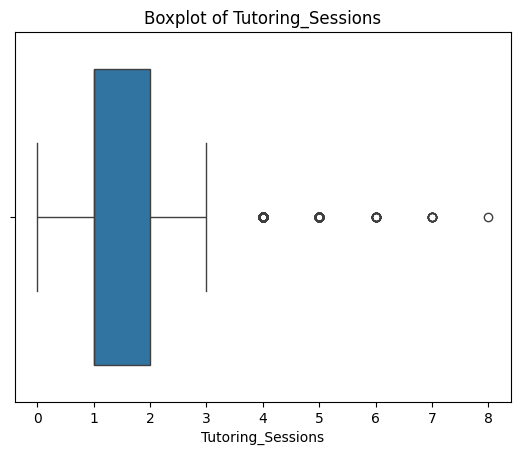

In [76]:
sns.boxplot(x=df['Tutoring_Sessions'])
plt.title('Boxplot of Tutoring_Sessions')
plt.show()

In [77]:
IQR = df['Tutoring_Sessions'].quantile(0.75) - df['Tutoring_Sessions'].quantile(0.25)

In [78]:
Lower_bound = df['Tutoring_Sessions'].quantile(0.25) - 1.5 * IQR
Upper_bound = df['Tutoring_Sessions'].quantile(0.75) + 1.5 * IQR
print("Lower Bound:", Lower_bound)
print("Upper Bound:", Upper_bound)

Lower Bound: -0.5
Upper Bound: 3.5


In [79]:
Lower_bound = 0
Upper_bound = 4

In [80]:
df['Tutoring_Sessions'].unique()

array([0, 2, 1, 3, 4, 5, 6, 7, 8])

In [81]:
df[df['Tutoring_Sessions'] < 1]

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0              23.0          84                  Low                High   
8              17.0          94               Medium                High   
9              23.0          98               Medium              Medium   
16             14.0          60               Medium                 Low   
20             29.0          78               Medium              Medium   
...             ...         ...                  ...                 ...   
6590           19.0          70               Medium              Medium   
6592           29.0         100               Medium                 Low   
6593           16.0          75                 High                 Low   
6597           16.0          91                 High              Medium   
6606           15.0          67               Medium                 Low   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                          False          7.0             73.0   
8                          False          6.0             80.0   
9                           True          8.0             71.0   
16                          True         10.0             65.0   
20                         False          5.0             99.0   
...                          ...          ...              ...   
6590                        True          7.0             95.0   
6592                        True          8.0            100.0   
6593                        True         10.0             53.0   
6597                        True          6.0             72.0   
6606                        True          9.0             94.0   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low            True                  0           Low   
8                High            True                  0        Medium   
9              Medium            True                  0          High   
16                Low            True                  0          High   
20               High            True                  0          High   
...               ...             ...                ...           ...   
6590             High           False                  0        Medium   
6592              Low            True                  0           Low   
6593             High            True                  0           Low   
6597             High            True                  0          High   
6606           Medium            True                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
8                Low     Private        Neutral                  1   
9               High      Public       Positive                  5   
16            Medium     Private       Positive                  3   
20            Medium      Public       Negative                  1   
...              ...         ...            ...                ...   
6590            High     Private       Positive                  3   
6592          Medium     Private        Neutral                  5   
6593             Low      Public       Positive                  4   
6597            High      Public       Negative                  2   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                    False              High School               Near   
8                    False                  College               Near   
9                    False              High School           Moderate   
16                   False                  College               Near   
20                   False              High School           Moderate   
...                    ...                      ...                ...   
6590                 False                  College 

In [82]:
df.loc[df['Tutoring_Sessions'] < 1, 'Tutoring_Sessions'] = 1

In [83]:
df[df['Tutoring_Sessions'] < 1]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [84]:
df[df['Tutoring_Sessions'] == 5]

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
82             29.0          78                 High                High   
168            19.0          91                 High                 Low   
190            17.0          71               Medium              Medium   
432            18.0          65               Medium                High   
454            17.0          61               Medium              Medium   
...             ...         ...                  ...                 ...   
6410           23.0          99               Medium              Medium   
6417           29.0          93               Medium                High   
6483           18.0          90                 High              Medium   
6538           17.0          65               Medium              Medium   
6553           16.0          74                  Low                High   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
82                          True          4.0             93.0   
168                        False          6.0             59.0   
190                         True          8.0             90.0   
432                         True          6.0             91.0   
454                         True          7.0             87.0   
...                          ...          ...              ...   
6410                       False          8.0             95.0   
6417                       False          7.0             82.0   
6483                        True          5.0             52.0   
6538                       False          6.0             61.0   
6553                       False          8.0             76.0   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
82                Low            True                  5        Medium   
168            Medium            True                  5        Medium   
190            Medium            True                  5        Medium   
432            Medium           False                  5           Low   
454              High            True                  5        Medium   
...               ...             ...                ...           ...   
6410             High            True                  5        Medium   
6417           Medium            True                  5           Low   
6483              Low            True                  5        Medium   
6538           Medium            True                  5           Low   
6553           Medium            True                  5           Low   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
82              High      Public        Neutral                  3   
168             High      Public        Neutral                  4   
190           Medium      Public       Positive                  1   
432           Medium     Private        Neutral                  3   
454           Medium      Public        Neutral                  3   
...              ...         ...            ...                ...   
6410          Medium      Public        Neutral                  4   
6417          Medium      Public       Negative                  3   
6483          Medium     Private       Positive                  3   
6538          Medium      Public       Positive                  4   
6553          Medium      Public       Negative                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
82                   False                  College               Near   
168                  False                  College           Moderate   
190                  False             Postgraduate                Far   
432                  False                  College               Near   
454                  False              High School               Near   
...                    ...                      ...                ...   
6410                 False              High School 

In [85]:
df.loc[df['Tutoring_Sessions'] == 5, 'Tutoring_Sessions'] = 4

In [86]:
df[df['Tutoring_Sessions'] == 5]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [87]:
df[df['Tutoring_Sessions'] > 5].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 679 to 6485
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               26 non-null     float64
 1   Attendance                  26 non-null     int64  
 2   Parental_Involvement        26 non-null     object 
 3   Access_to_Resources         26 non-null     object 
 4   Extracurricular_Activities  26 non-null     bool   
 5   Sleep_Hours                 26 non-null     float64
 6   Previous_Scores             26 non-null     float64
 7   Motivation_Level            26 non-null     object 
 8   Internet_Access             26 non-null     object 
 9   Tutoring_Sessions           26 non-null     int64  
 10  Family_Income               26 non-null     object 
 11  Teacher_Quality             26 non-null     object 
 12  School_Type                 26 non-null     object 
 13  Peer_Influence              26 non-nul

In [88]:
df.loc[df['Tutoring_Sessions'] > 5,'Tutoring_Sessions' ] = np.nan

In [89]:
df['Tutoring_Sessions'].isnull().sum()

np.int64(26)

In [90]:
df.dropna(subset=['Tutoring_Sessions'],inplace=True)


In [91]:
df['Tutoring_Sessions'].isnull().sum()

np.int64(0)

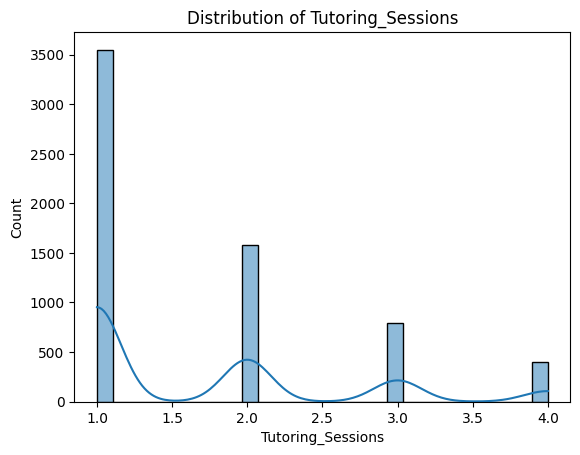

In [92]:
sns.histplot(df['Tutoring_Sessions'], kde=True)
plt.title('Distribution of Tutoring_Sessions')
plt.show()

In [93]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.968661    79.997784     7.037195        75.030231   
std         5.976496    11.545986     1.466974        14.390554   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

### Previous_Scores

In [94]:
IQR = df['Previous_Scores'].quantile(0.75) - df['Previous_Scores'].quantile(0.25)
lower_bound = df['Previous_Scores'].quantile(0.25) - 1.5 * IQR
upper_bound = df['Previous_Scores'].quantile(0.75) + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 27.0
Upper Bound: 123.0


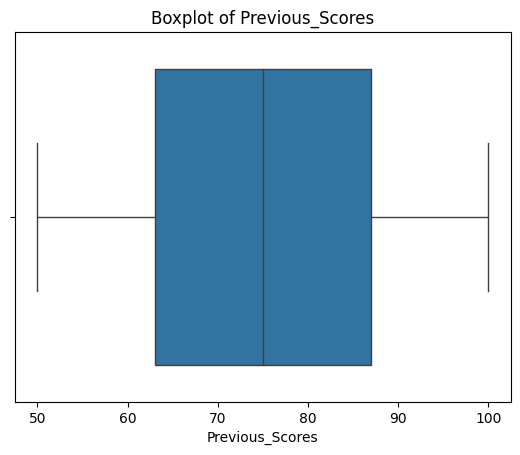

In [95]:
sns.boxplot(x=df['Previous_Scores'])
plt.title('Boxplot of Previous_Scores')
plt.show()

In [96]:
df[df['Previous_Scores'] < lower_bound]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [97]:
df[df['Previous_Scores'] > upper_bound]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

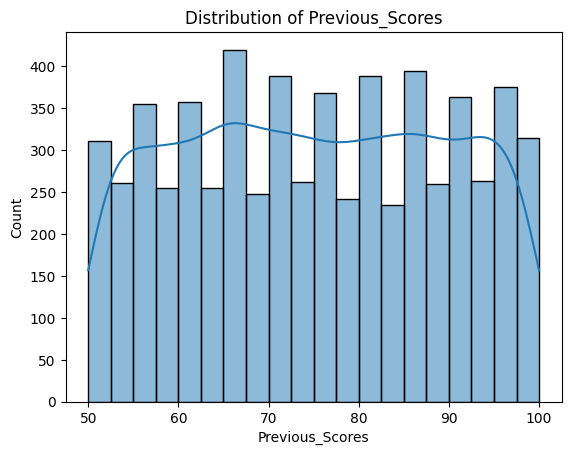

In [98]:
sns.histplot(df['Previous_Scores'], kde=True)
plt.title('Distribution of Previous_Scores')
plt.show()


In [99]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.968661    79.997784     7.037195        75.030231   
std         5.976496    11.545986     1.466974        14.390554   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

### Sleep_Hours

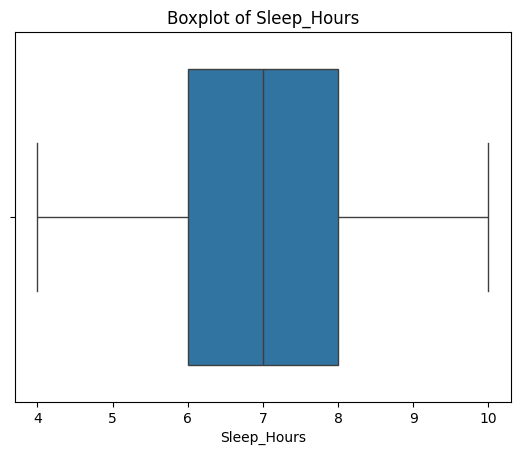

In [100]:
sns.boxplot(x=df['Sleep_Hours'])
plt.title('Boxplot of Sleep_Hours')
plt.show()

In [101]:
IQR = df['Sleep_Hours'].quantile(0.75) - df['Sleep_Hours'].quantile(0.25)
lower_bound = df['Sleep_Hours'].quantile(0.25) - 1.5 * IQR
upper_bound = df['Sleep_Hours'].quantile(0.75) + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 3.0
Upper Bound: 11.0


In [102]:
df[df["Sleep_Hours"] < lower_bound]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [103]:
df[df["Sleep_Hours"] > upper_bound]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [104]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.968661    79.997784     7.037195        75.030231   
std         5.976496    11.545986     1.466974        14.390554   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

### Attendance

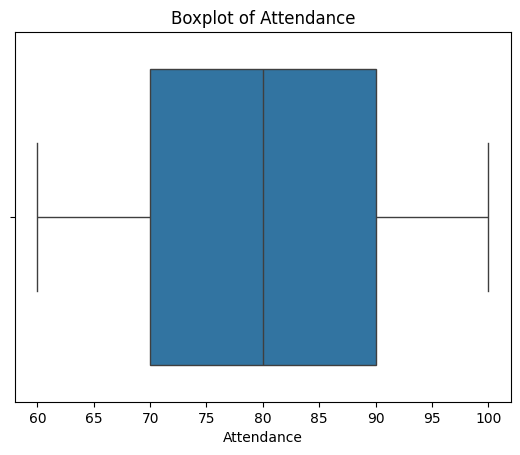

In [105]:
sns.boxplot(x=df['Attendance'])
plt.title('Boxplot of Attendance')
plt.show()

In [106]:
IQR = df['Attendance'].quantile(0.75) - df['Attendance'].quantile(0.25)
lower_bound = df['Attendance'].quantile(0.25) - 1.5 * IQR
upper_bound = df['Attendance'].quantile(0.75) + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 40.0
Upper Bound: 120.0


In [107]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.968661    79.997784     7.037195        75.030231   
std         5.976496    11.545986     1.466974        14.390554   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

### Hours_Studied

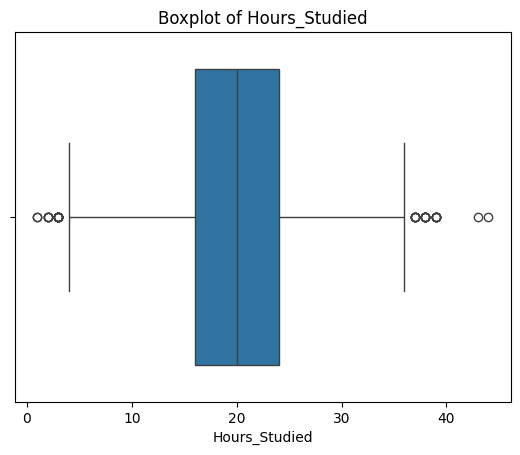

In [108]:
sns.boxplot(x=df['Hours_Studied'])
plt.title('Boxplot of Hours_Studied')
plt.show()

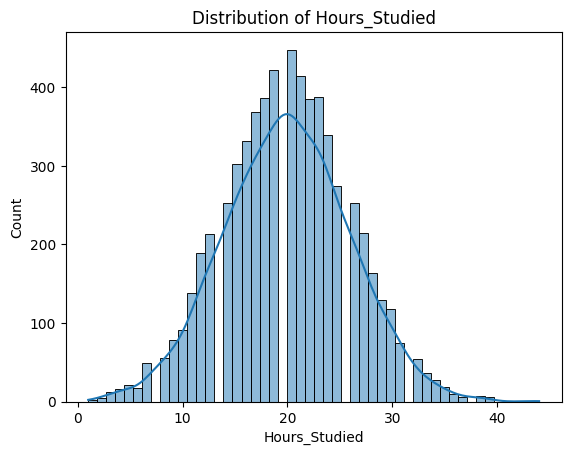

In [109]:
sns.histplot(df['Hours_Studied'], kde=True)
plt.title('Distribution of Hours_Studied')
plt.show()


In [110]:
IQR = df['Hours_Studied'].quantile(0.75) - df['Hours_Studied'].quantile(0.25)
lower_bound = df['Hours_Studied'].quantile(0.25) - 1.5 * IQR
upper_bound = df['Hours_Studied'].quantile(0.75) + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 4.0
Upper Bound: 36.0


In [111]:
df["Hours_Studied"].max()

np.float64(44.0)

In [112]:
df["Hours_Studied"].min()

np.float64(1.0)

In [113]:
df.loc[df['Hours_Studied'] > 36, 'Hours_Studied'] = 36.0

In [114]:
df["Hours_Studied"].max()

np.float64(36.0)

In [115]:
df.loc[df['Hours_Studied'] < 4.0, 'Hours_Studied'] = 4.0

In [116]:
df["Hours_Studied"].min()

np.float64(4.0)

# EDA After Cleaning

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6318 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6318 non-null   float64
 1   Attendance                  6318 non-null   int64  
 2   Parental_Involvement        6318 non-null   object 
 3   Access_to_Resources         6318 non-null   object 
 4   Extracurricular_Activities  6318 non-null   bool   
 5   Sleep_Hours                 6318 non-null   float64
 6   Previous_Scores             6318 non-null   float64
 7   Motivation_Level            6318 non-null   object 
 8   Internet_Access             6318 non-null   object 
 9   Tutoring_Sessions           6318 non-null   float64
 10  Family_Income               6318 non-null   object 
 11  Teacher_Quality             6318 non-null   object 
 12  School_Type                 6318 non-null   object 
 13  Peer_Influence              6318 non-n

In [118]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [119]:
df.shape

(6318, 20)

In [120]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [121]:
numerical_col = df.select_dtypes(include="number")
numerical_col

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
0              23.0          84          7.0             73.0   
1              19.0          64          8.0             59.0   
2              24.0          98          7.0             91.0   
3              29.0          89          8.0             98.0   
4              19.0          92          6.0             65.0   
...             ...         ...          ...              ...   
6602           25.0          69          7.0             76.0   
6603           23.0          76          8.0             81.0   
6604           20.0          90          6.0             65.0   
6605           10.0          86          6.0             91.0   
6606           15.0          67          9.0             94.0   

      Tutoring_Sessions  Physical_Activity  Exam_Score  
0                   1.0                  3        67.0  
1                   2.0                  4        61.0  
2                   2.0                  4        74.0  
3                   1.0                  4        71.0  
4                   3.0                  4        70.0  
...                 ...                ...         ...  
6602                1.0                  2        68.0  
6603                3.0                  2        69.0  
6604                3.0                  2        68.0  
6605                2.0                  3        68.0  
6606                1.0                  4        64.0  

[6318 rows x 7 columns]

<Axes: >

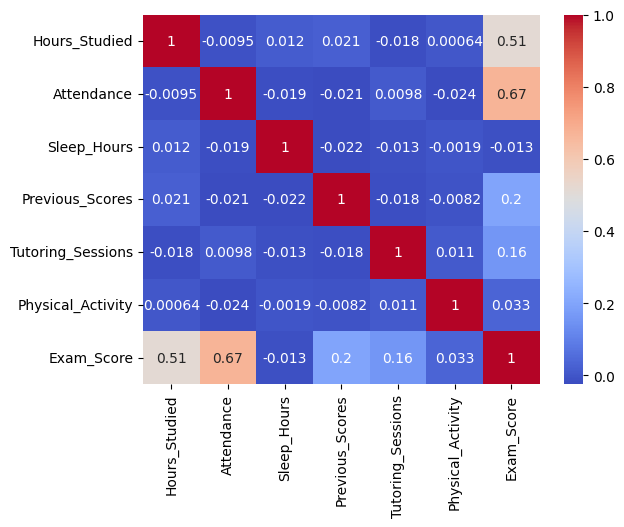

In [122]:
corr=numerical_col.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

## Univariant Analysis

### Numerical Columns

In [123]:
df["Hours_Studied"].unique()


array([23., 19., 24., 29., 25., 17., 21.,  9., 10., 14., 22., 15., 12.,
       20., 11., 13., 16., 18., 31.,  8., 26., 28.,  4., 35., 27., 33.,
       36., 34., 30.,  7., 32.,  6.,  5.])

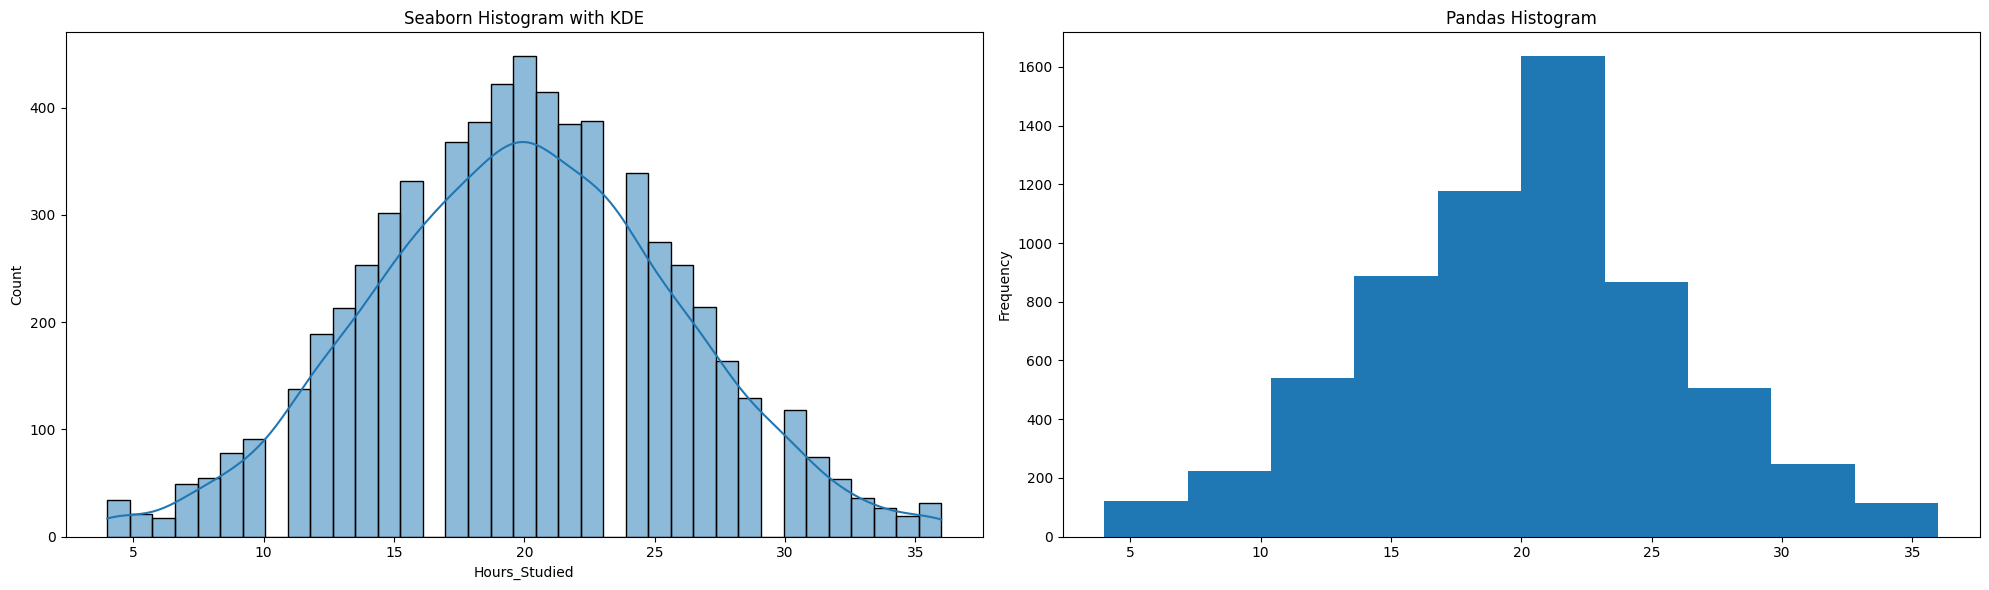

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# First plot: Seaborn histplot with KDE
sns.histplot(df['Hours_Studied'], kde=True, ax=axs[0])
axs[0].set_title('Seaborn Histogram with KDE')

# Second plot: Pandas histogram
df['Hours_Studied'].plot(kind='hist', ax=axs[1])
axs[1].set_title('Pandas Histogram')

plt.tight_layout()
plt.show()

In [125]:
df["Attendance"].unique()


array([ 84,  64,  98,  89,  92,  88,  78,  94,  80,  97,  83,  82,  68,
        60,  70,  75,  99,  74,  65,  62,  91,  90,  66,  69,  72,  63,
        61,  86,  77,  71,  67,  87,  73,  96, 100,  81,  95,  79,  85,
        76,  93])

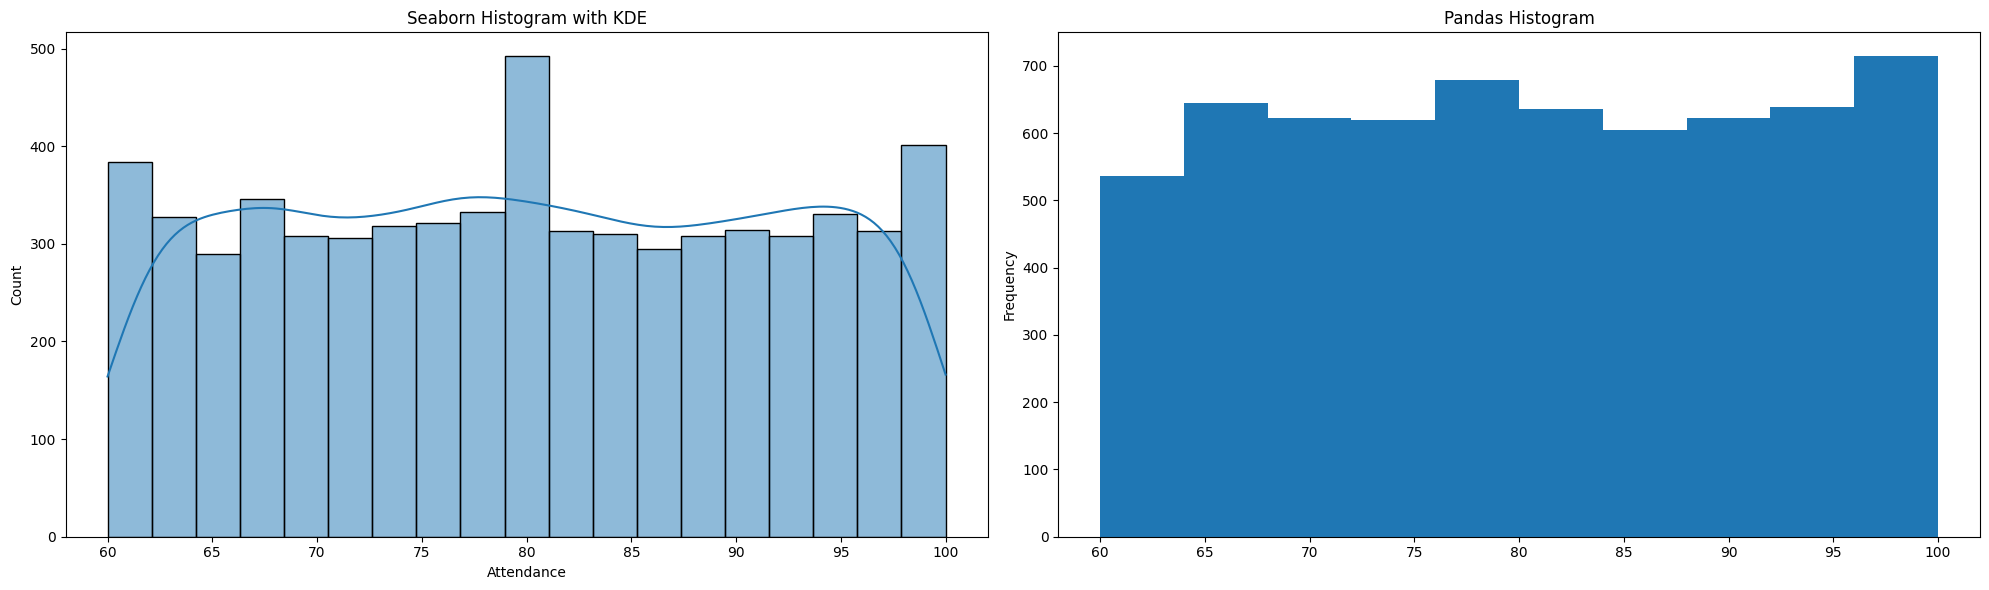

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# First plot: Seaborn histplot with KDE
sns.histplot(df['Attendance'], kde=True, ax=axs[0])
axs[0].set_title('Seaborn Histogram with KDE')

# Second plot: Pandas histogram
df['Attendance'].plot(kind='hist', ax=axs[1])
axs[1].set_title('Pandas Histogram')

plt.tight_layout()
plt.show()

In [127]:
df["Sleep_Hours"].unique()


array([ 7.,  8.,  6., 10.,  9.,  5.,  4.])

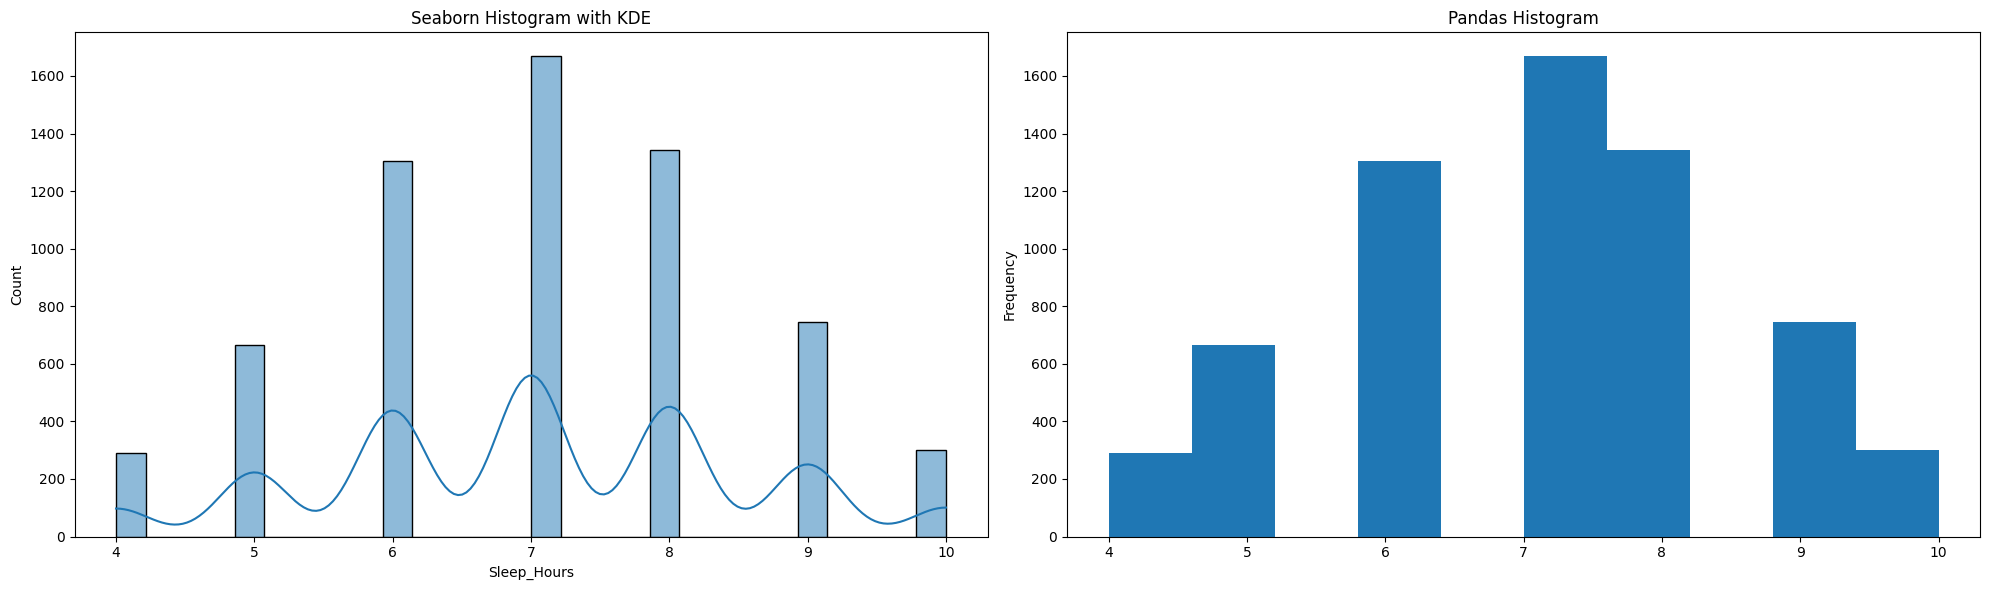

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# First plot: Seaborn histplot with KDE
sns.histplot(df['Sleep_Hours'], kde=True, ax=axs[0])
axs[0].set_title('Seaborn Histogram with KDE')

# Second plot: Pandas histogram
df['Sleep_Hours'].plot(kind='hist', ax=axs[1])
axs[1].set_title('Pandas Histogram')

plt.tight_layout()
plt.show()

In [129]:
df["Previous_Scores"].unique()


array([ 73.,  59.,  91.,  98.,  65.,  89.,  68.,  50.,  80.,  71.,  88.,
        87.,  97.,  72.,  74.,  70.,  82.,  58.,  99.,  84., 100.,  75.,
        54.,  90.,  94.,  51.,  57.,  66.,  96.,  93.,  56.,  52.,  63.,
        79.,  81.,  69.,  95.,  60.,  92.,  77.,  62.,  85.,  78.,  64.,
        76.,  55.,  86.,  61.,  53.,  83.,  67.])

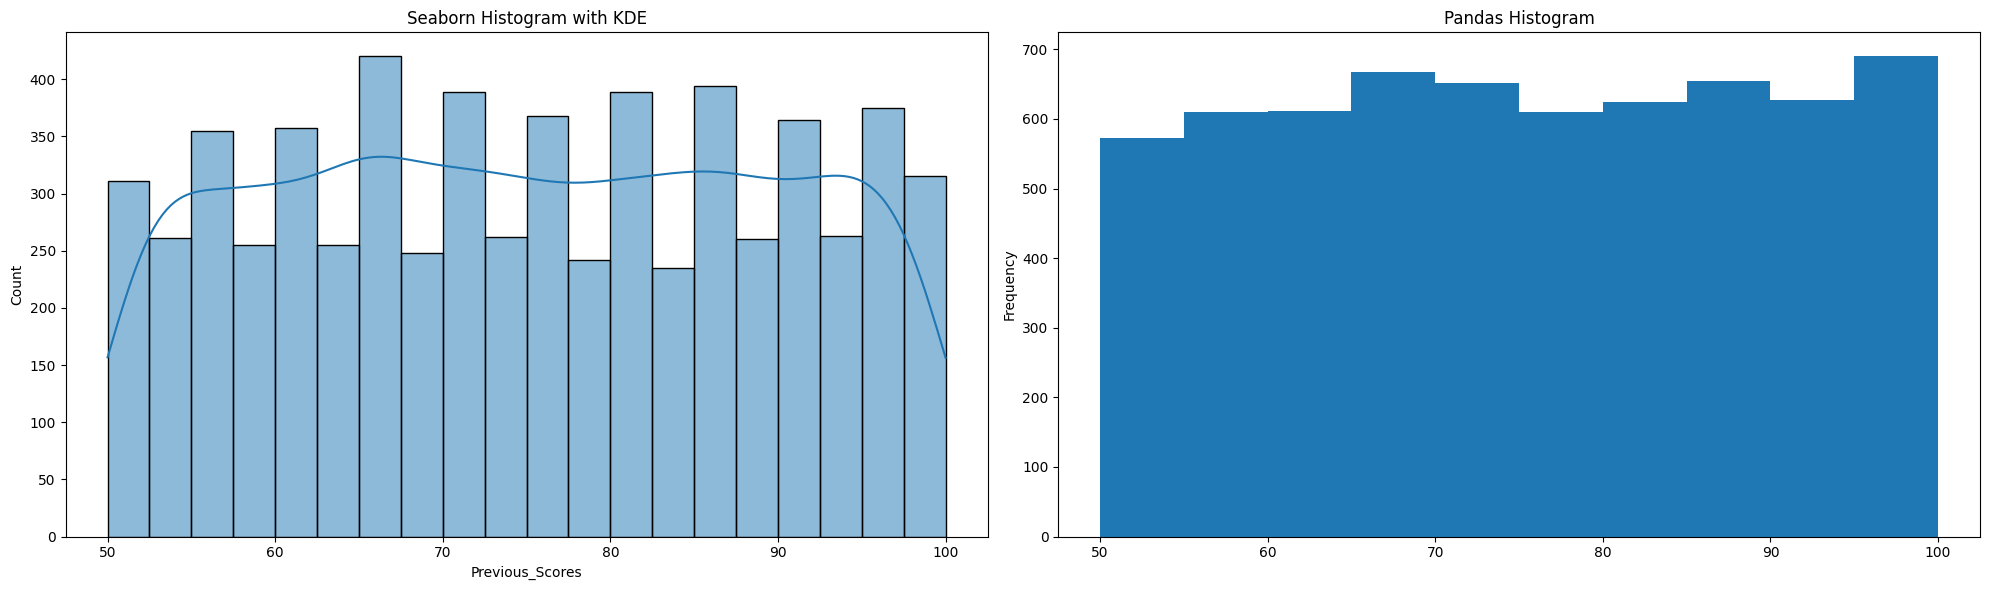

In [130]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# First plot: Seaborn histplot with KDE
sns.histplot(df['Previous_Scores'], kde=True, ax=axs[0])
axs[0].set_title('Seaborn Histogram with KDE')

# Second plot: Pandas histogram
df['Previous_Scores'].plot(kind='hist', ax=axs[1])
axs[1].set_title('Pandas Histogram')

plt.tight_layout()
plt.show()

In [131]:
df["Tutoring_Sessions"].unique()


array([1., 2., 3., 4.])

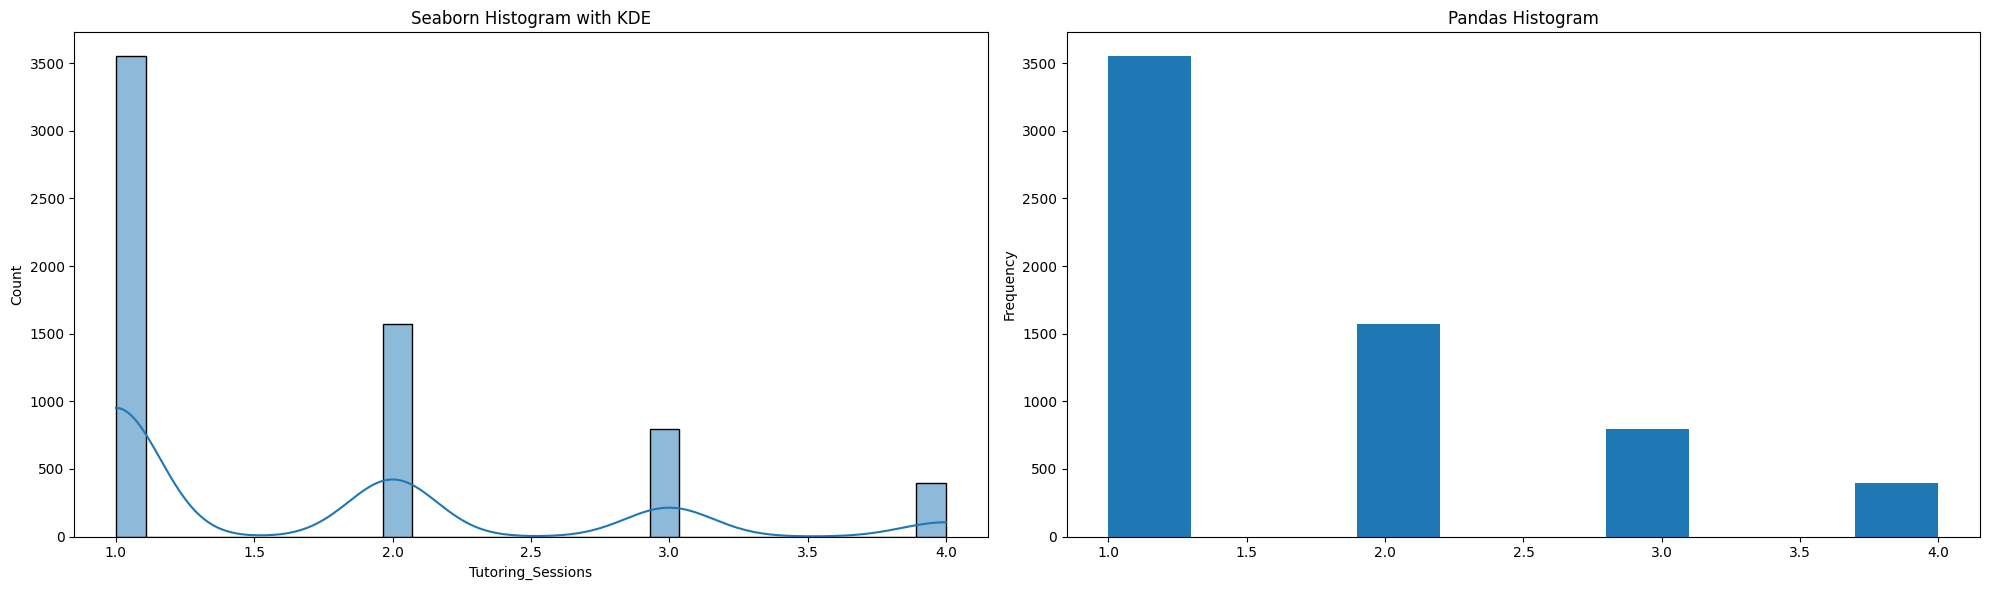

In [132]:

fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# First plot: Seaborn histplot with KDE
sns.histplot(df['Tutoring_Sessions'], kde=True, ax=axs[0])
axs[0].set_title('Seaborn Histogram with KDE')

# Second plot: Pandas histogram
df['Tutoring_Sessions'].plot(kind='hist', ax=axs[1])
axs[1].set_title('Pandas Histogram')

plt.tight_layout()
plt.show()

In [133]:
df["Exam_Score"].unique()


array([67., 61., 74., 71., 70., 66., 69., 72., 68., 65., 64., 60., 63.,
       62., 75., 73., 59.])

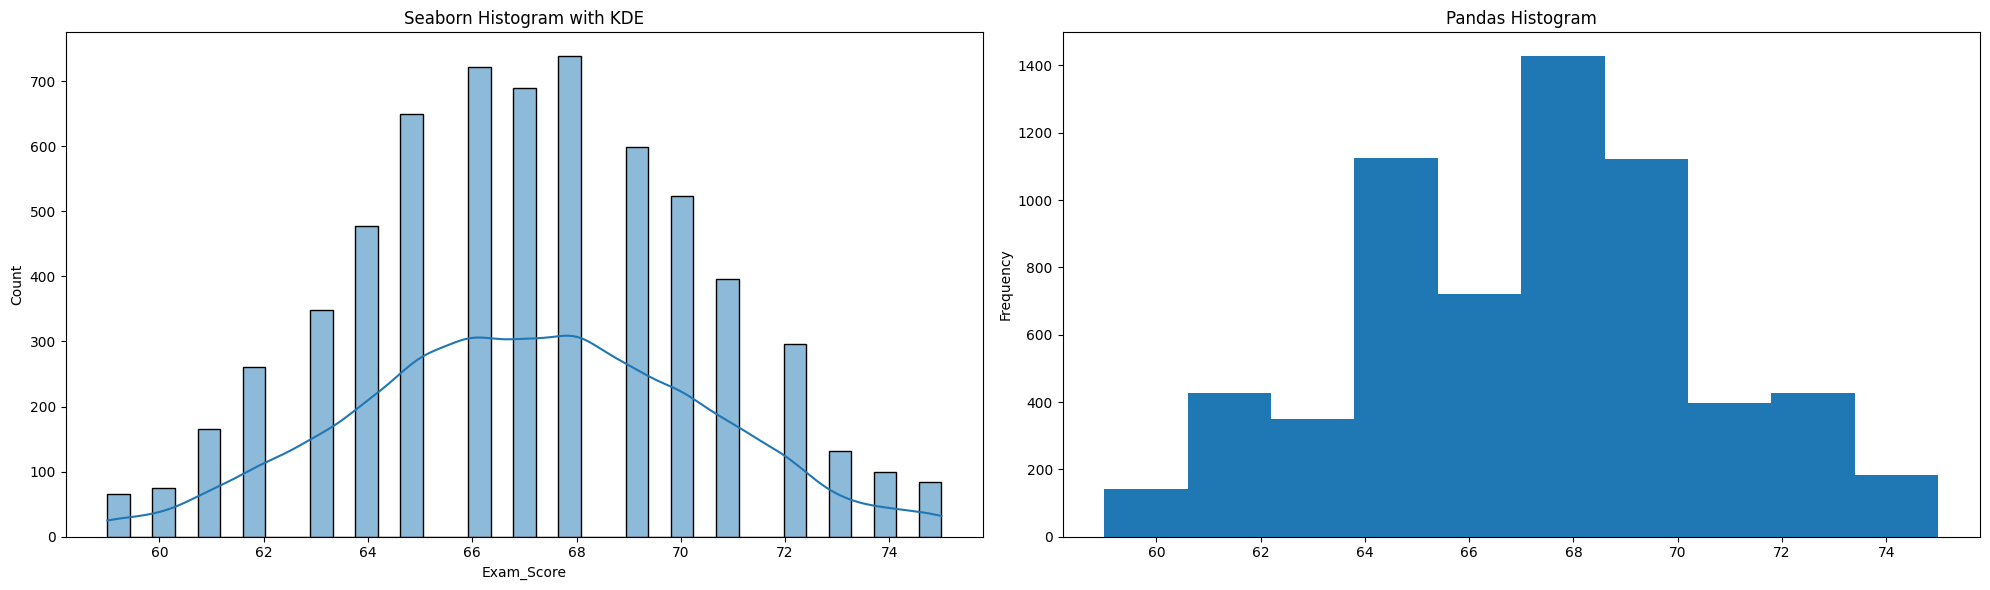

In [134]:

fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# First plot: Seaborn histplot with KDE
sns.histplot(df['Exam_Score'], kde=True, ax=axs[0])
axs[0].set_title('Seaborn Histogram with KDE')

# Second plot: Pandas histogram
df['Exam_Score'].plot(kind='hist', ax=axs[1])
axs[1].set_title('Pandas Histogram')

plt.tight_layout()
plt.show()

In [135]:
df["Physical_Activity"].unique()


array([3, 4, 2, 1, 5, 0, 6])

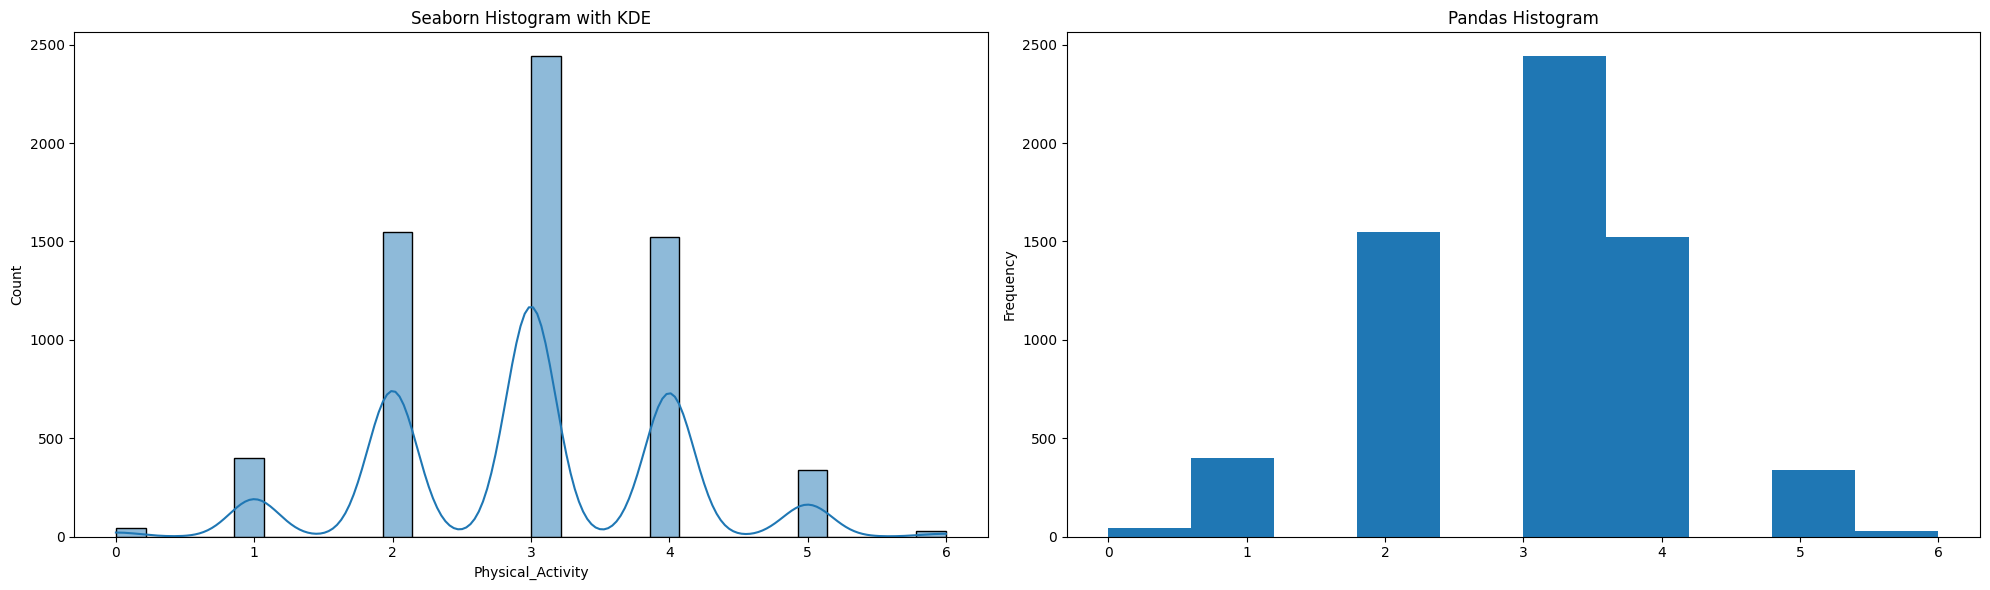

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# First plot: Seaborn histplot with KDE
sns.histplot(df['Physical_Activity'], kde=True, ax=axs[0])
axs[0].set_title('Seaborn Histogram with KDE')

# Second plot: Pandas histogram
df['Physical_Activity'].plot(kind='hist', ax=axs[1])
axs[1].set_title('Pandas Histogram')

plt.tight_layout()
plt.show()

### Categorical Columns

In [137]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

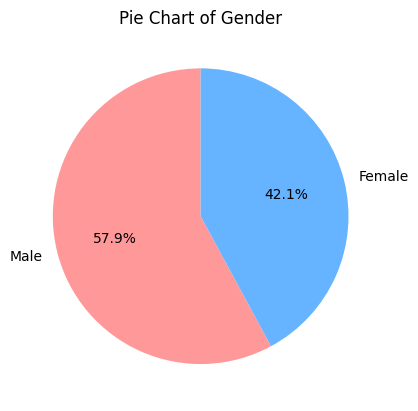

In [138]:
colors = ['#ff9999','#66b3ff','#ffcc99','#c2c2f0','#99ff99']  # Customize as needed

df['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Gender')
plt.ylabel('')  # Hide y-axis label
plt.show()

In [139]:
df['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far'], dtype=object)

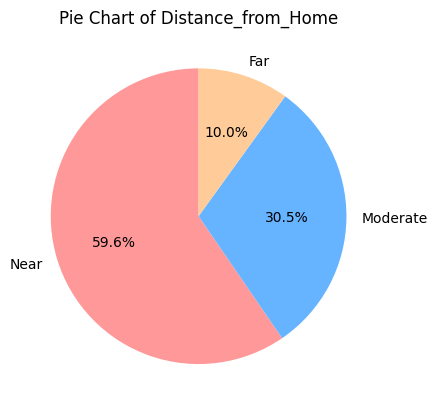

In [140]:
colors = ['#ff9999','#66b3ff','#ffcc99','#c2c2f0','#99ff99']  # Customize as needed

df['Distance_from_Home'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Distance_from_Home')
plt.ylabel('')  # Hide y-axis label
plt.show()

In [141]:
df["Parental_Education_Level"].unique()

array(['High School', 'College', 'Postgraduate'], dtype=object)

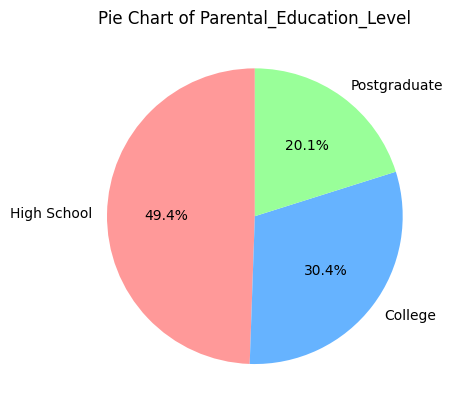

In [142]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize as needed

df['Parental_Education_Level'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Parental_Education_Level')
plt.ylabel('')  # Hide y-axis label
plt.show()

In [143]:
df["Learning_Disabilities"].unique()

array([False, True], dtype=object)

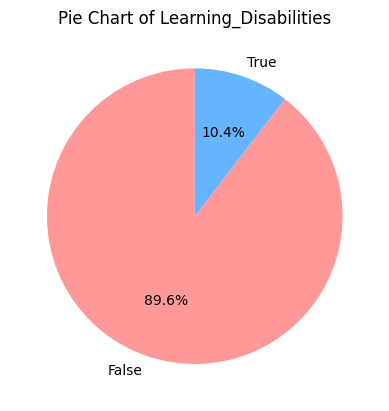

In [144]:
colors = ['#ff9999','#66b3ff','#ffcc99','#c2c2f0','#99ff99']  # Customize as needed

df['Learning_Disabilities'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Learning_Disabilities')
plt.ylabel('')  # Hide y-axis label
plt.show()

In [145]:
df["Peer_Influence"].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

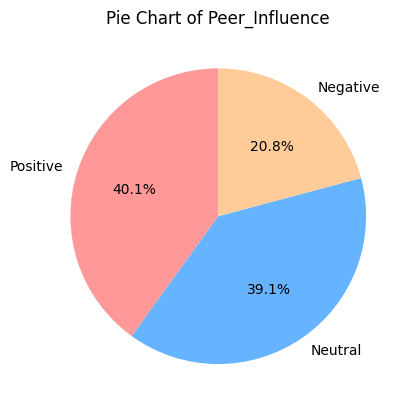

In [146]:
colors = ['#ff9999','#66b3ff','#ffcc99','#c2c2f0','#99ff99']  # Customize as needed

df['Peer_Influence'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Peer_Influence')
plt.ylabel('')  # Hide y-axis label
plt.show()

In [147]:
df["School_Type"].unique()

array(['Public', 'Private'], dtype=object)

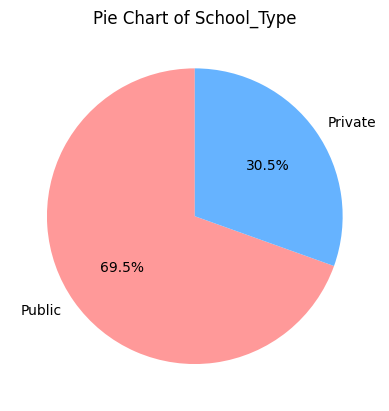

In [148]:
colors = ['#ff9999','#66b3ff','#ffcc99','#c2c2f0','#99ff99']  # Customize as needed

df['School_Type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of School_Type')
plt.ylabel('')  # Hide y-axis label
plt.show()

In [149]:
df["Teacher_Quality"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

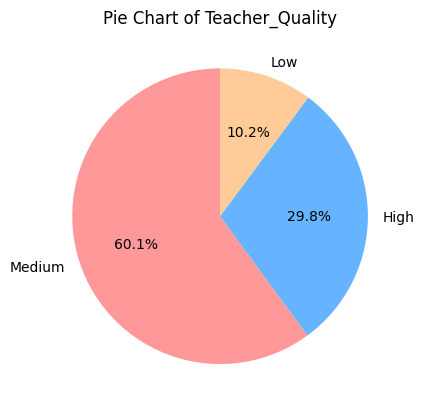

In [150]:
colors = ['#ff9999','#66b3ff','#ffcc99','#c2c2f0','#99ff99']  # Customize as needed

df['Teacher_Quality'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Teacher_Quality')
plt.ylabel('')  # Hide y-axis label
plt.show()


In [151]:
df["Family_Income"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

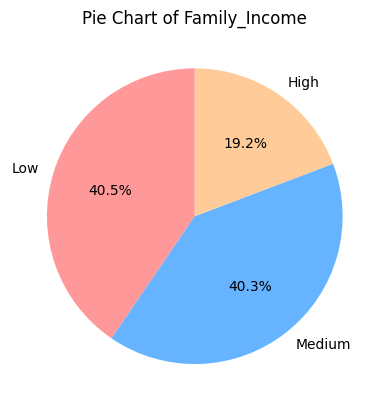

In [152]:
colors = ['#ff9999','#66b3ff','#ffcc99','#c2c2f0','#99ff99']  # Customize as needed

df['Family_Income'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Family_Income')
plt.ylabel('')  # Hide y-axis label
plt.show()


In [153]:
df["Internet_Access"].unique()

array([True, False], dtype=object)

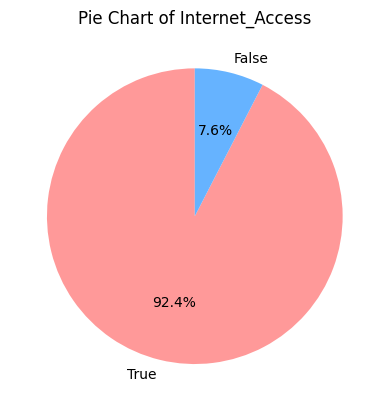

In [154]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize as needed

df['Internet_Access'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Internet_Access')
plt.ylabel('')  # Hide y-axis label
plt.show()


In [155]:
df["Motivation_Level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

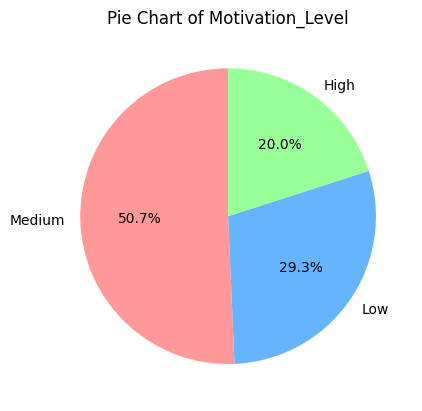

In [156]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize as needed

df['Motivation_Level'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Motivation_Level')
plt.ylabel('')  # Hide y-axis label
plt.show()


In [157]:
df["Extracurricular_Activities"].unique()

array([False,  True])

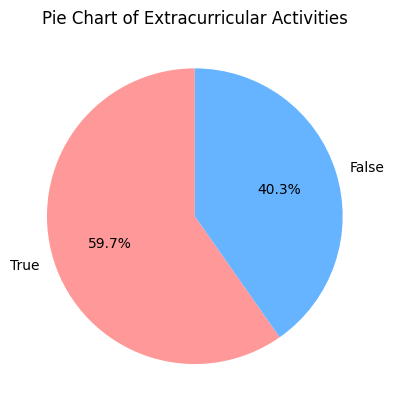

In [158]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize as needed

df['Extracurricular_Activities'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Extracurricular Activities')
plt.ylabel('')  # Hide y-axis label
plt.show()



In [159]:
df["Access_to_Resources"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

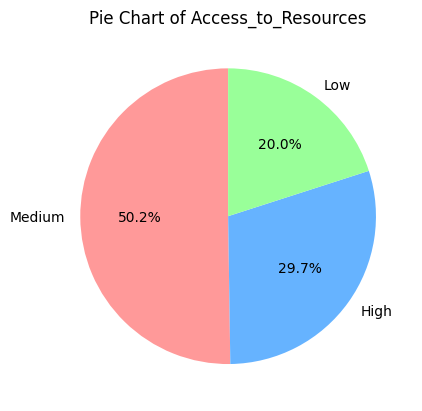

In [160]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize as needed

df['Access_to_Resources'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Access_to_Resources')
plt.ylabel('')  # Hide y-axis label
plt.show()

In [161]:
df["Parental_Involvement"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

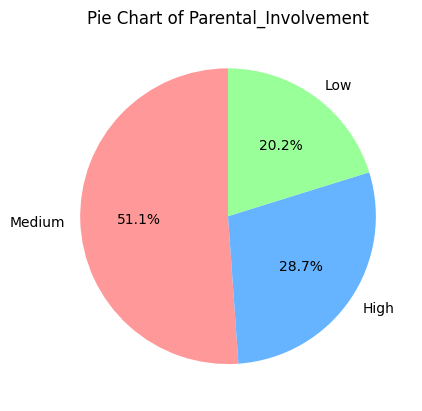

In [162]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize as needed

df['Parental_Involvement'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  # 👈 Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Parental_Involvement')
plt.ylabel('')  # Hide y-axis label
plt.show()

## Bivariant Analysis

### Relationships between numerical columns and each other

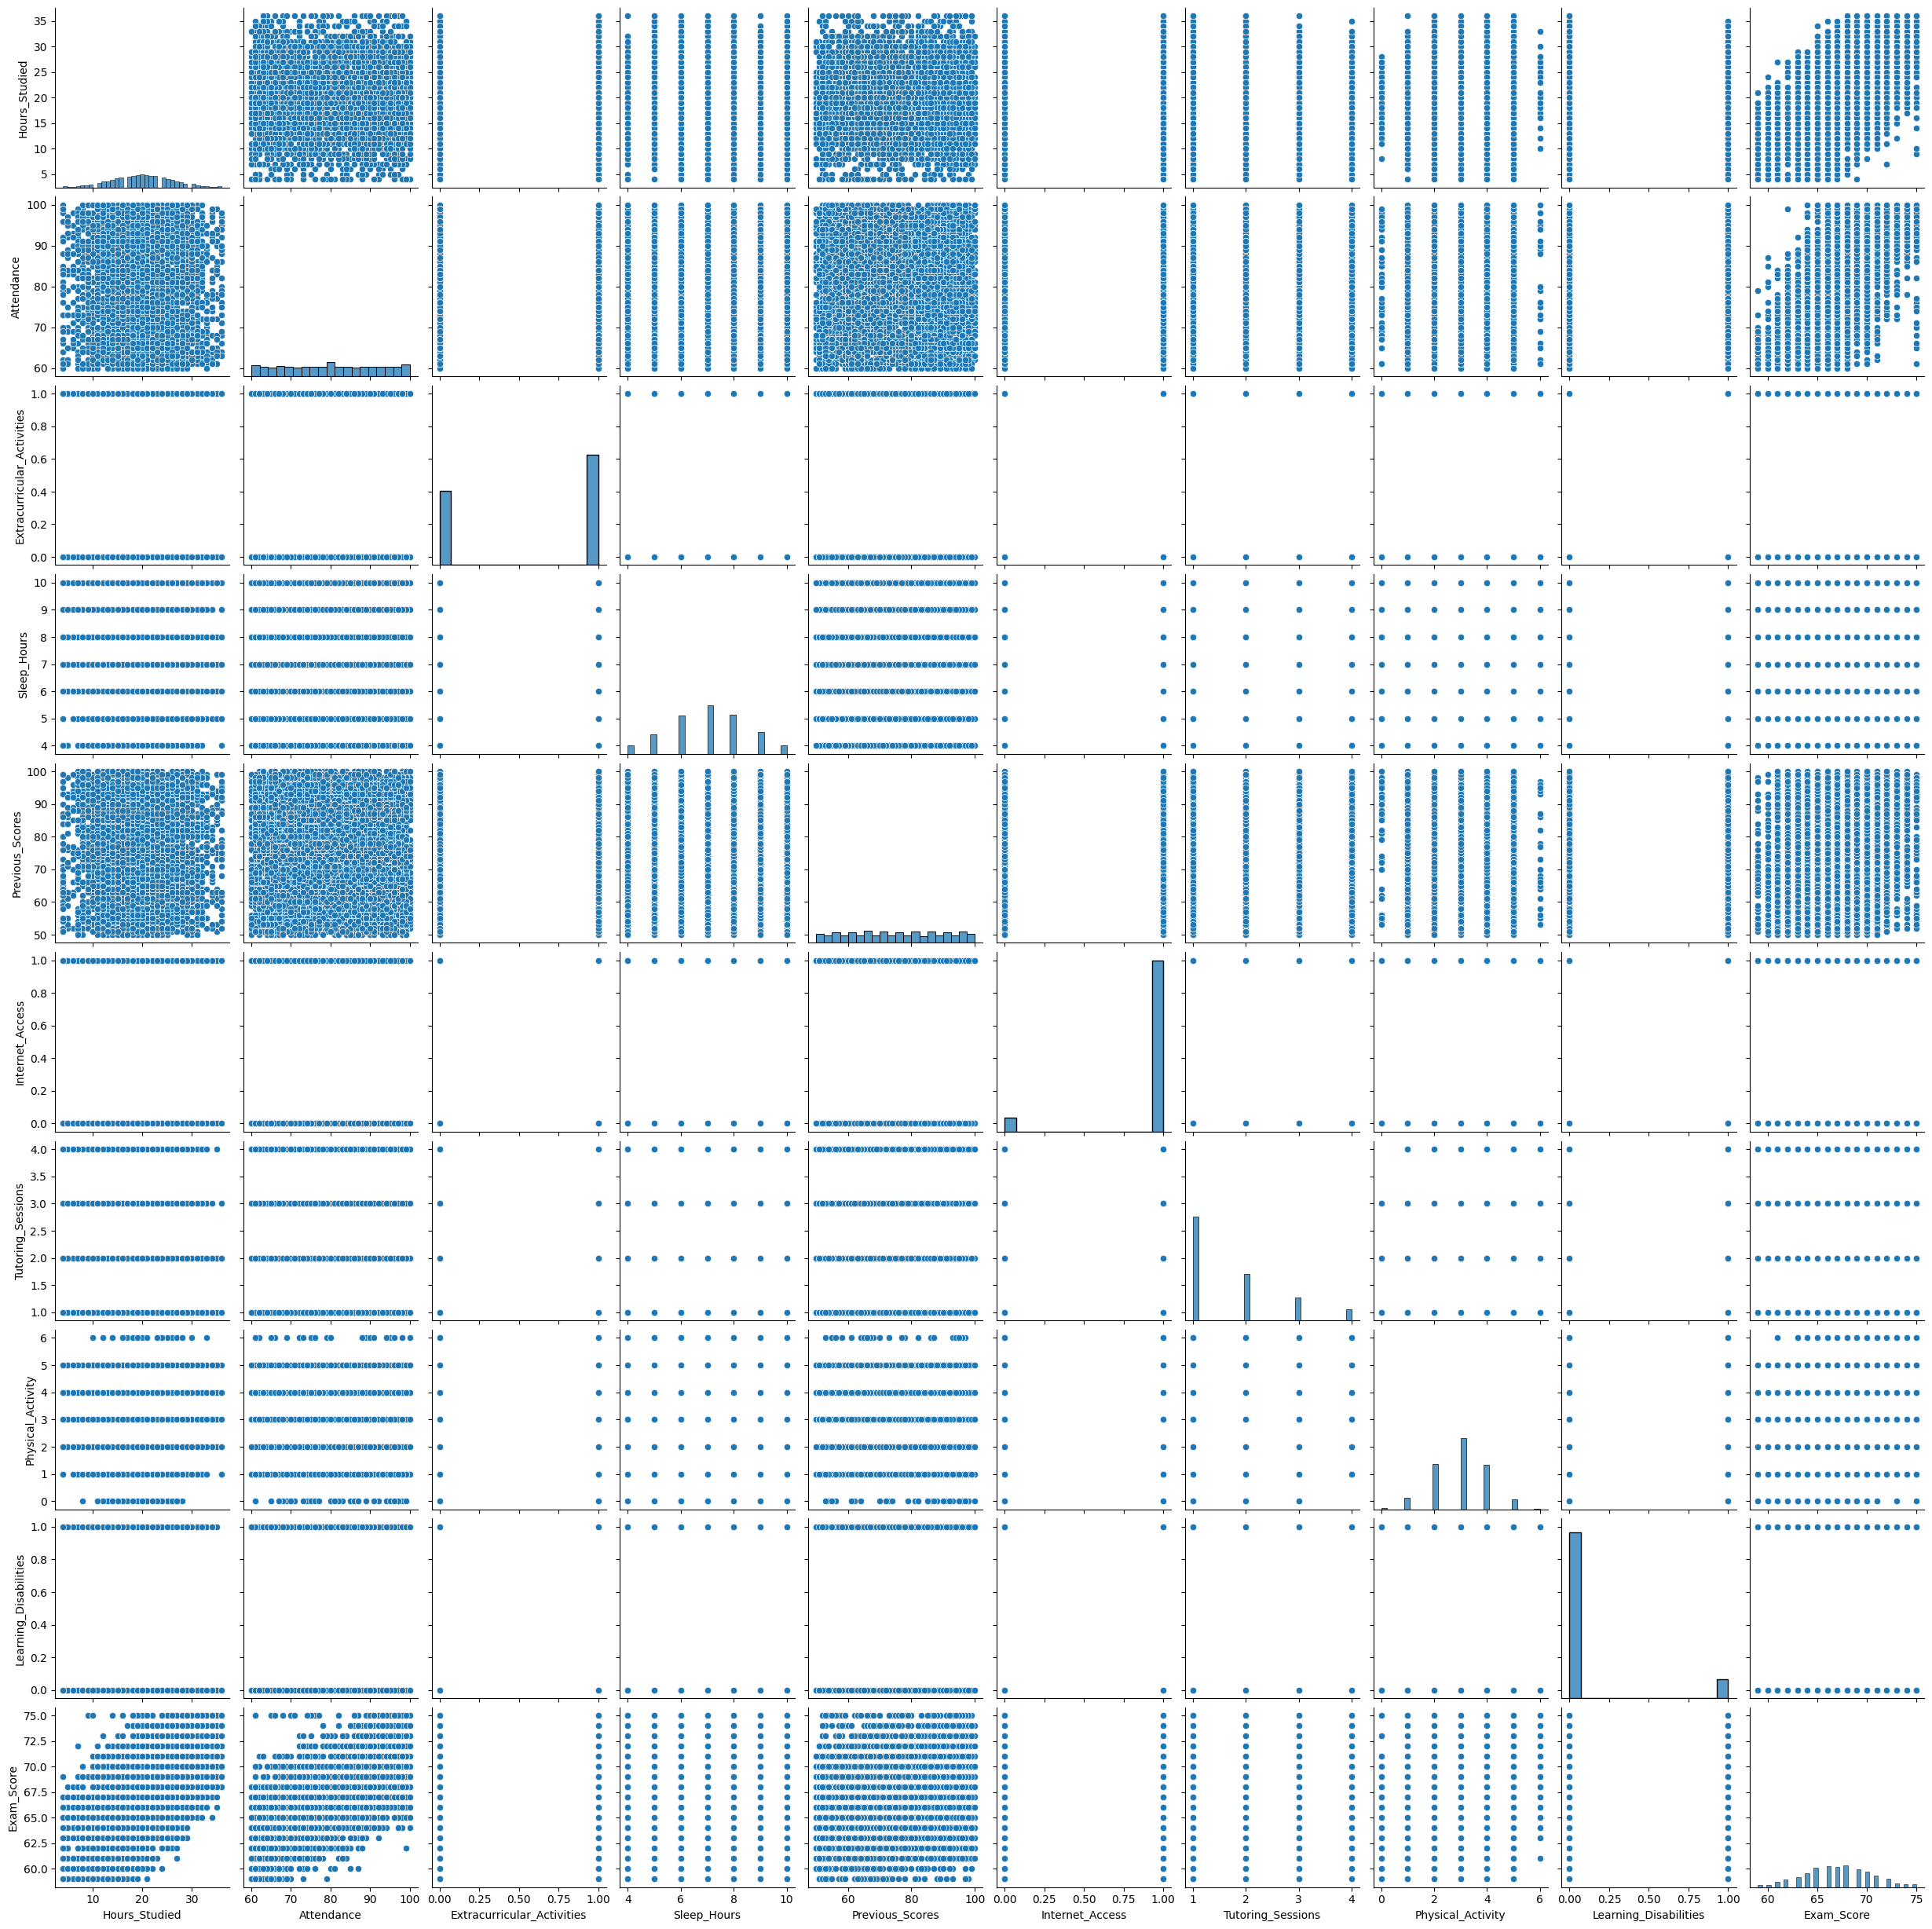

In [163]:
sns.pairplot(df)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6318 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6318 non-null   float64
 1   Attendance                  6318 non-null   int64  
 2   Parental_Involvement        6318 non-null   object 
 3   Access_to_Resources         6318 non-null   object 
 4   Extracurricular_Activities  6318 non-null   bool   
 5   Sleep_Hours                 6318 non-null   float64
 6   Previous_Scores             6318 non-null   float64
 7   Motivation_Level            6318 non-null   object 
 8   Internet_Access             6318 non-null   object 
 9   Tutoring_Sessions           6318 non-null   float64
 10  Family_Income               6318 non-null   object 
 11  Teacher_Quality             6318 non-null   object 
 12  School_Type                 6318 non-null   object 
 13  Peer_Influence              6318 non-n

In [165]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.964387    79.997784     7.037195        75.030231   
std         5.939607    11.545986     1.466974        14.390554   
min         4.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        36.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

#### Hours_Studied & Attendance

<Axes: xlabel='Hours_Studied', ylabel='Attendance'>

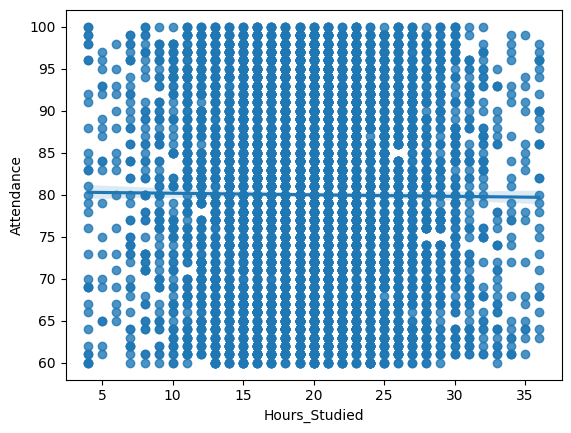

In [166]:
# no strong linear relationship, but some positive correlation.
sns.regplot(data=df, x='Hours_Studied', y='Attendance')

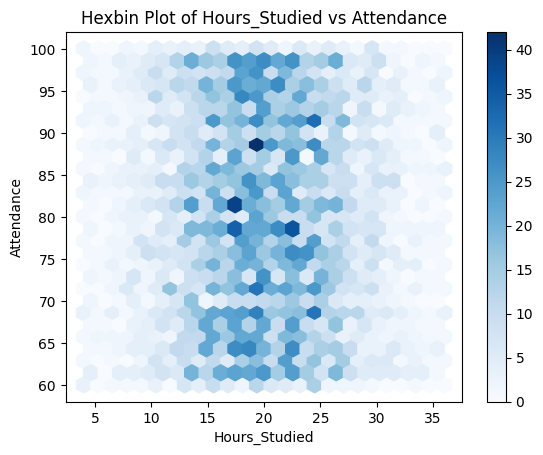

In [167]:
# This plot shows the density of points in the Hours_Studied vs Attendance space, with darker areas indicating more points.
df.plot.hexbin(x='Hours_Studied', y='Attendance', gridsize=25, cmap='Blues')
plt.title('Hexbin Plot of Hours_Studied vs Attendance')
plt.show()

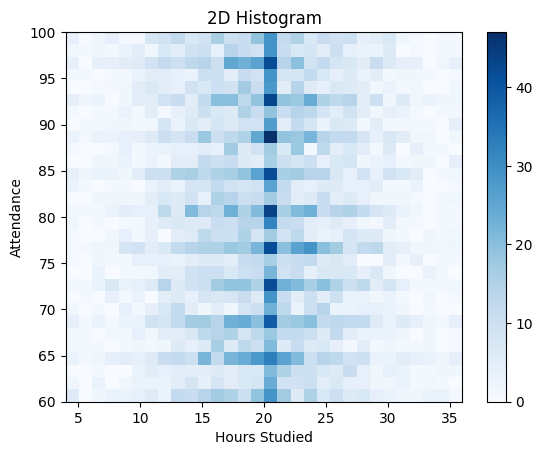

In [168]:
plt.hist2d(df['Hours_Studied'], df['Attendance'], bins=30, cmap='Blues')
plt.colorbar()
plt.xlabel('Hours Studied')
plt.ylabel('Attendance')
plt.title('2D Histogram')
plt.show()


<Axes: xlabel='Hours_Studied', ylabel='Attendance'>

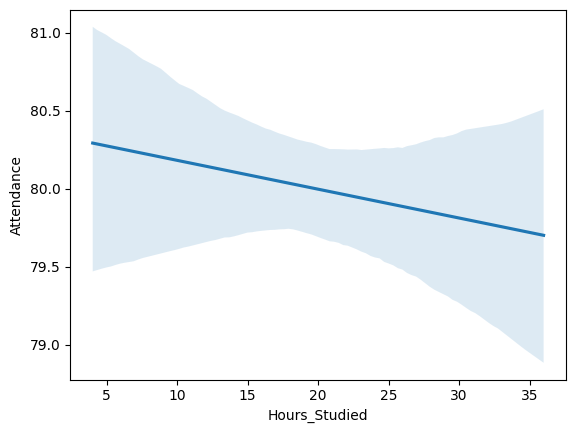

In [169]:
sns.regplot(x='Hours_Studied', y='Attendance', data=df, scatter=False)


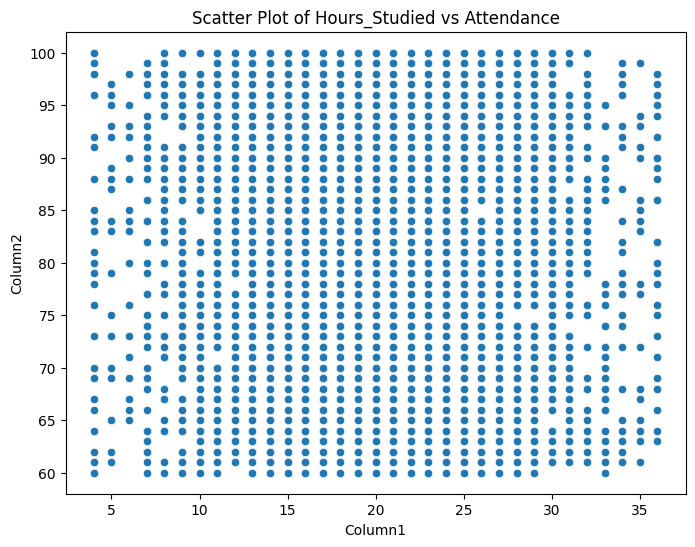

In [170]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Attendance')
plt.title('Scatter Plot of Hours_Studied vs Attendance')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

In [171]:
numerical_col = df[['Hours_Studied', 'Attendance']]

<Axes: >

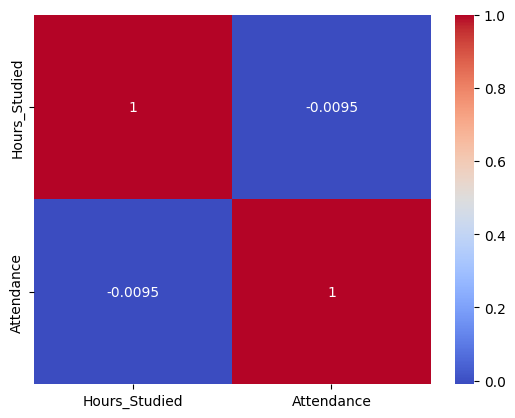

In [172]:
corr = numerical_col.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [173]:
# All of these visualizations clearly show that there is a weak correlation or no correlation between Hours_Studied and Attendance.

In [174]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.964387    79.997784     7.037195        75.030231   
std         5.939607    11.545986     1.466974        14.390554   
min         4.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        36.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

#### Hours_Studied & Sleep_Hours

In [175]:
colors = ['#ffcc99','#66b3ff','#99ff99','#c2c2f0','#ff9999']  # Customize as needed

In [176]:
numerical_col = df[['Hours_Studied', 'Sleep_Hours']]

<Axes: >

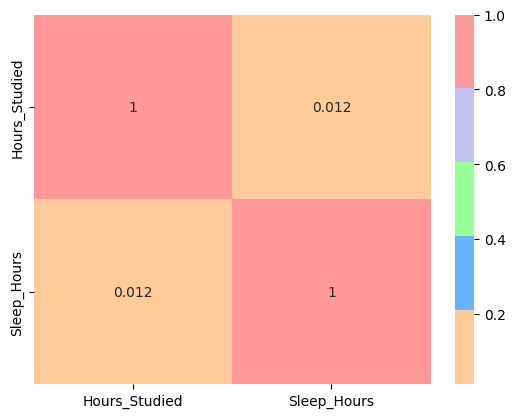

In [177]:
corr = numerical_col.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=colors)

<Axes: xlabel='Hours_Studied', ylabel='Sleep_Hours'>

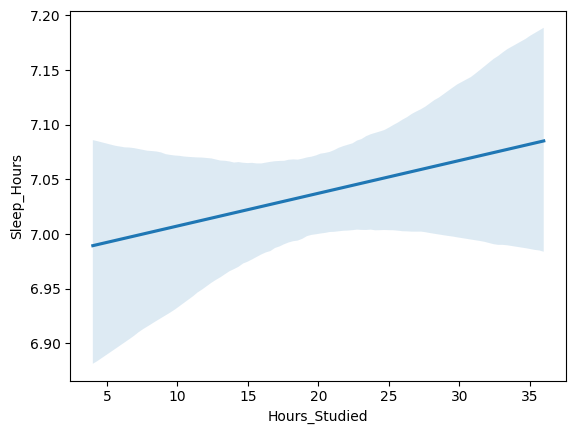

In [178]:
sns.regplot(x='Hours_Studied', y='Sleep_Hours', data=df, scatter=False)

<Axes: xlabel='Hours_Studied', ylabel='Sleep_Hours'>

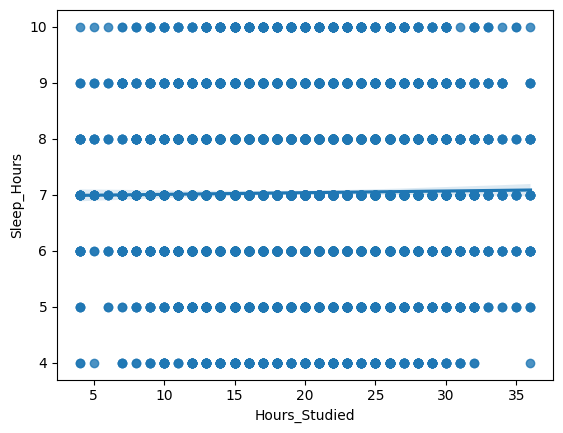

In [179]:
sns.regplot(x='Hours_Studied', y='Sleep_Hours', data=df)

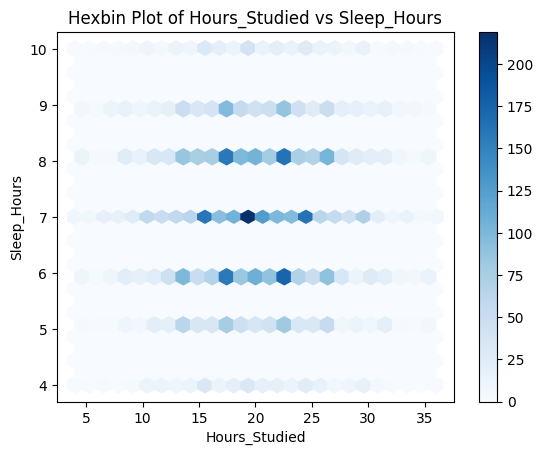

In [180]:
# This plot shows the density of points in the Hours_Studied vs Attendance space, with darker areas indicating more points.
df.plot.hexbin(x='Hours_Studied', y='Sleep_Hours', gridsize=25, cmap='Blues')
plt.title('Hexbin Plot of Hours_Studied vs Sleep_Hours')
plt.show()

In [181]:
# There is a positive correlation between Hours_Studied and Sleep_Hours, but it is not very strong.

In [182]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.964387    79.997784     7.037195        75.030231   
std         5.939607    11.545986     1.466974        14.390554   
min         4.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        36.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

#### Hours_Studied & Previous_Scores

In [183]:
numerical_col = df[['Hours_Studied', 'Previous_Scores']]

<Axes: >

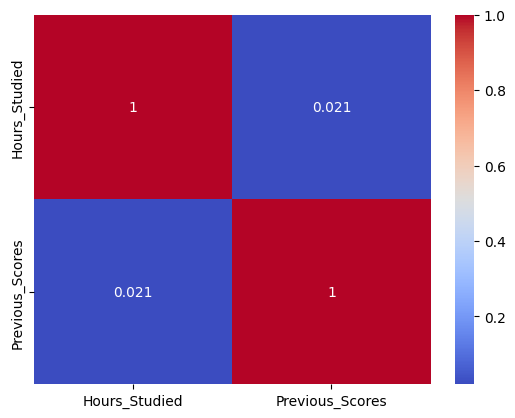

In [184]:
corr = numerical_col.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='Hours_Studied', ylabel='Previous_Scores'>

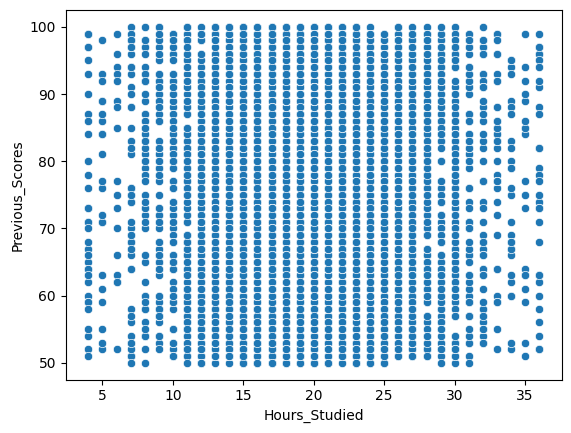

In [185]:
sns.scatterplot(data=df, x='Hours_Studied', y='Previous_Scores')

<Axes: xlabel='Hours_Studied', ylabel='Previous_Scores'>

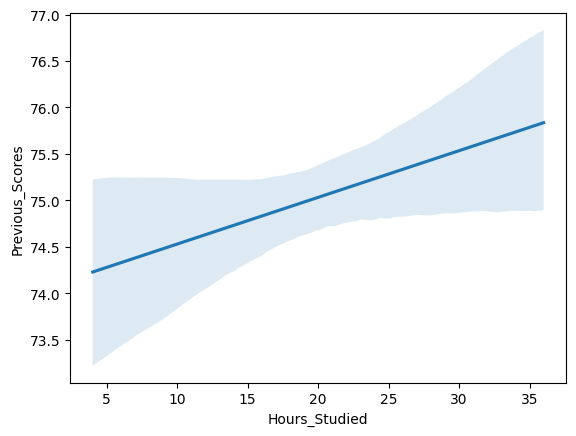

In [186]:
sns.regplot(x='Hours_Studied', y='Previous_Scores', data=df, scatter=False)

In [187]:
# There is a positive correlation between Hours_Studied and Previous_Scores, but it is not very strong.

In [188]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.964387    79.997784     7.037195        75.030231   
std         5.939607    11.545986     1.466974        14.390554   
min         4.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        36.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

#### Hours_Studied & Tutoring_Sessions

In [189]:
numerical_col = df[['Hours_Studied', 'Tutoring_Sessions']]

In [190]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize as needed

<Axes: >

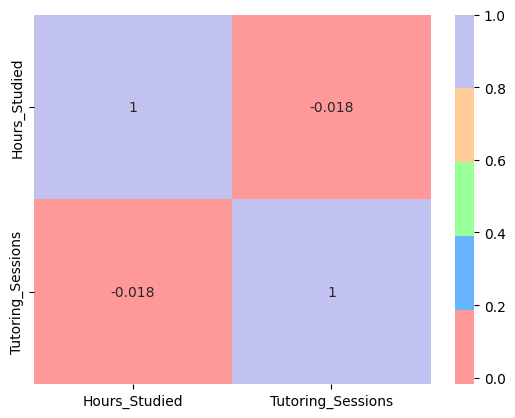

In [191]:
corr = numerical_col.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap = colors)

<Axes: xlabel='Hours_Studied', ylabel='Tutoring_Sessions'>

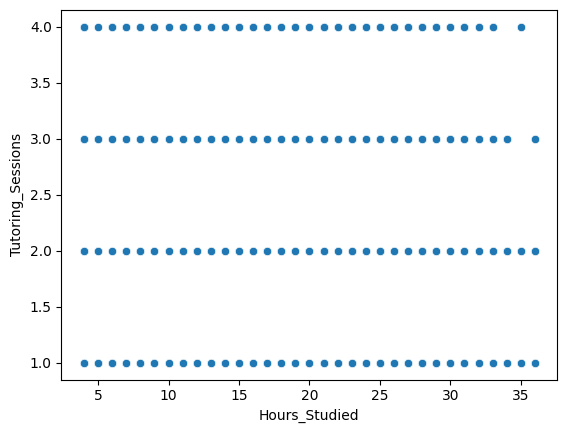

In [192]:
sns.scatterplot(data=df, x='Hours_Studied', y='Tutoring_Sessions')

<Axes: xlabel='Hours_Studied', ylabel='Tutoring_Sessions'>

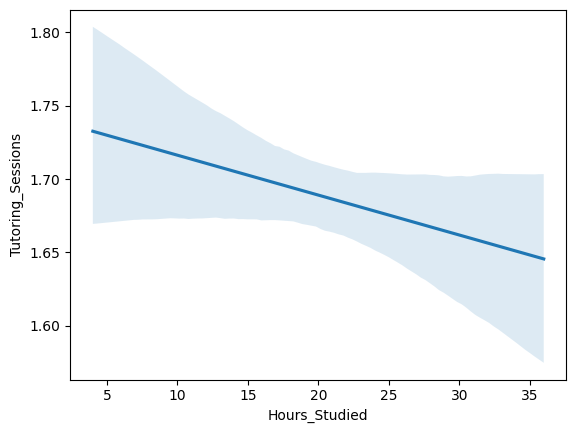

In [193]:
sns.regplot(x='Hours_Studied', y='Tutoring_Sessions', data=df, scatter=False)

<Axes: xlabel='Hours_Studied', ylabel='Tutoring_Sessions'>

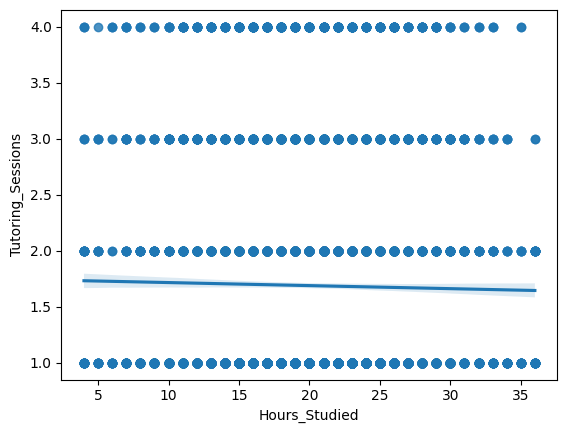

In [194]:
sns.regplot(x='Hours_Studied', y='Tutoring_Sessions', data=df)

In [195]:
# There is a positive correlation between Hours_Studied and Tutoring_Sessions, but it is not very strong.

In [196]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.964387    79.997784     7.037195        75.030231   
std         5.939607    11.545986     1.466974        14.390554   
min         4.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        36.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

#### Hours_Studied & Physical_Activity

In [197]:
numerical_col = df[['Hours_Studied', 'Physical_Activity']]

In [198]:
colors = ['#66b3ff','#99ff99','#ffcc99','#ff9999','#c2c2f0']  # Customize as needed

<Axes: >

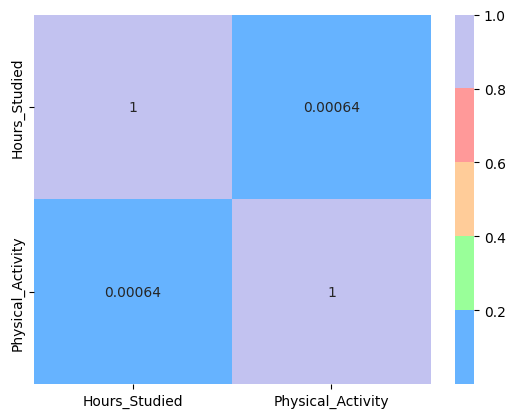

In [199]:
corr = numerical_col.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=colors)

<Axes: xlabel='Hours_Studied', ylabel='Physical_Activity'>

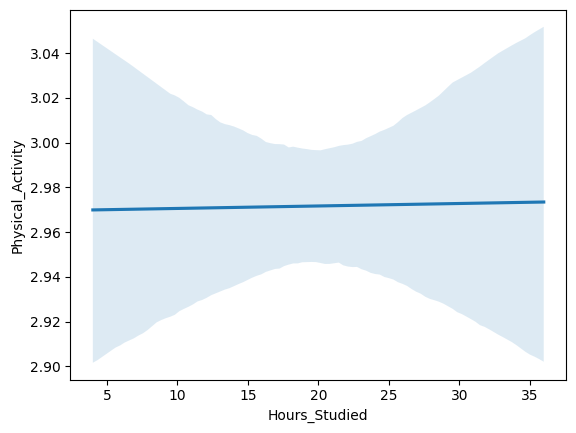

In [200]:
sns.regplot(x='Hours_Studied', y='Physical_Activity', data=df, scatter=False)

<Axes: xlabel='Hours_Studied', ylabel='Physical_Activity'>

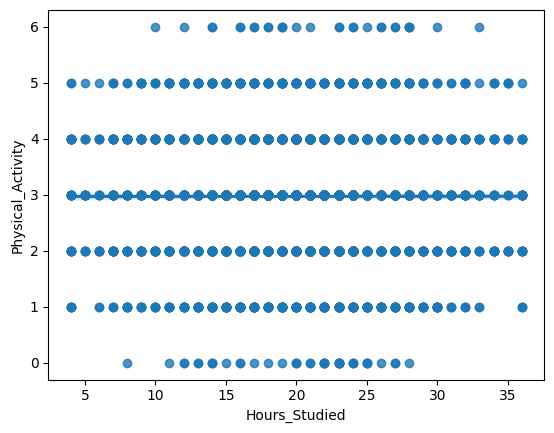

In [201]:
sns.regplot(x='Hours_Studied', y='Physical_Activity', data=df)

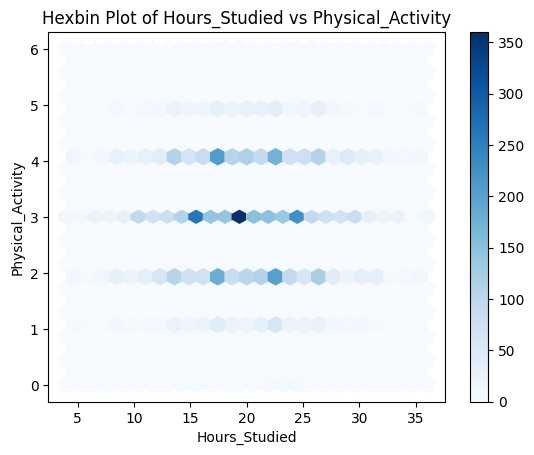

In [202]:
# This plot shows the density of points in the Hours_Studied vs Physical_Activity space, with darker areas indicating more points.
df.plot.hexbin(x='Hours_Studied', y='Physical_Activity', gridsize=25, cmap='Blues')
plt.title('Hexbin Plot of Hours_Studied vs Physical_Activity')
plt.show()

In [203]:
# There is a positive correlation between Hours_Studied and Physical_Activity, but it is not very strong.

In [204]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.964387    79.997784     7.037195        75.030231   
std         5.939607    11.545986     1.466974        14.390554   
min         4.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        36.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

#### Hours_Studied & Exam_Score

In [205]:
colors = ["#fffc99d7","#580e0e"]  # Customize as needed

In [206]:
numerical_col = df[['Hours_Studied', 'Exam_Score']]

<Axes: >

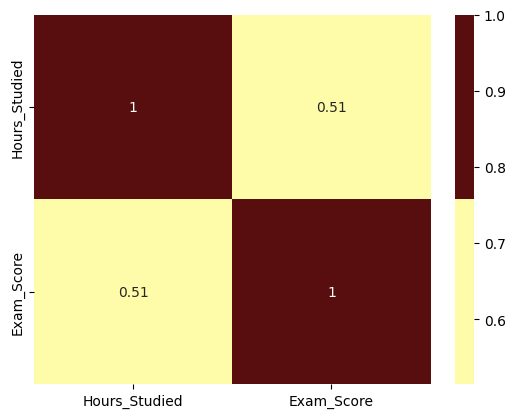

In [207]:
corr = numerical_col.corr()
sns.heatmap(corr, annot=True, cmap=colors)

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

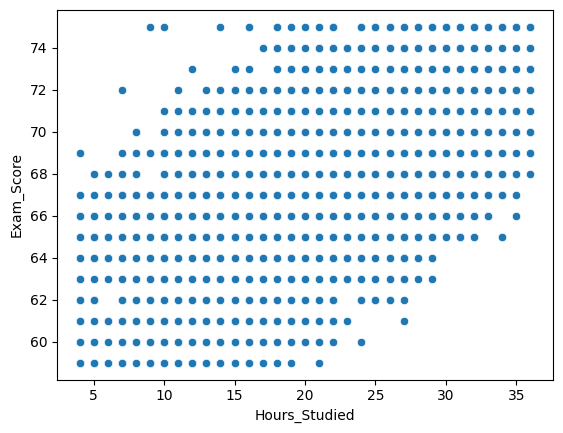

In [208]:
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

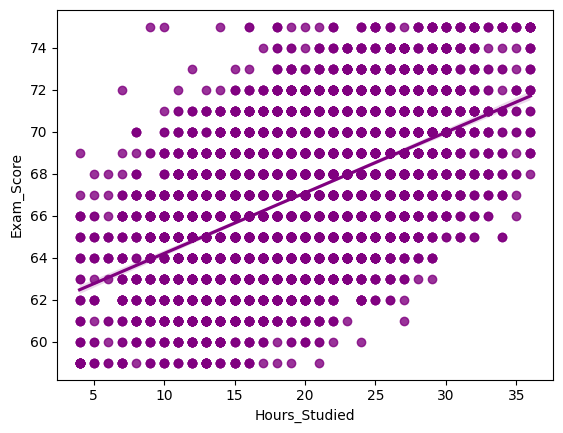

In [209]:
sns.regplot(x='Hours_Studied', y='Exam_Score', data=df, color='Purple')

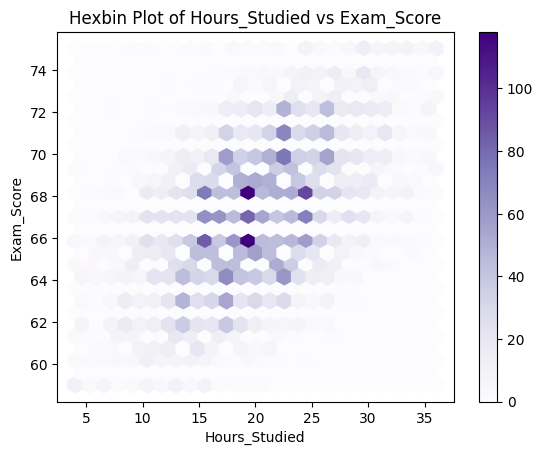

In [210]:
# This plot shows the density of points in the Hours_Studied vs Exam_Score space, with darker areas indicating more points.
df.plot.hexbin(x='Hours_Studied', y='Exam_Score', gridsize=25, cmap='Purples')
plt.title('Hexbin Plot of Hours_Studied vs Exam_Score')
plt.show()

In [211]:
# There is a positive correlation between Hours_Studied and Exam_Score,and it is strong.

### Relationships between numerical and categorical columns 

#### Hours_Studied & Gender

In [212]:
df.describe(exclude="number")

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6318                6318                       6318   
unique                    3                   3                          2   
top                  Medium              Medium                       True   
freq                   3230                3174                       3774   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6318            6318          6318            6318   
unique                3               2             3               3   
top              Medium            True           Low          Medium   
freq               3203            5839          2557            3795   

       School_Type Peer_Influence Learning_Disabilities  \
count         6318           6318                  6318   
unique           2              3                     2   
top         Public       Positive                 False   
freq          4393           2531                  5659   

       Parental_Education_Level Distance_from_Home Gender  
count                      6318               6318   6318  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3124               3763   3658

In [213]:
colors = ['#66b3ff',"#cf26b0",'#99ff99','#ffcc99','#c2c2f0']  # Customize as needed

In [214]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Gender', ylabel='Hours_Studied'>

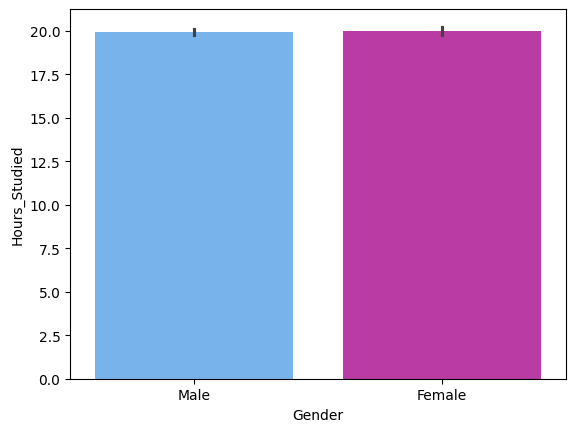

In [215]:
sns.barplot(x='Gender', y='Hours_Studied', data=df, palette=colors)


In [216]:
df.describe(exclude="number")

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6318                6318                       6318   
unique                    3                   3                          2   
top                  Medium              Medium                       True   
freq                   3230                3174                       3774   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6318            6318          6318            6318   
unique                3               2             3               3   
top              Medium            True           Low          Medium   
freq               3203            5839          2557            3795   

       School_Type Peer_Influence Learning_Disabilities  \
count         6318           6318                  6318   
unique           2              3                     2   
top         Public       Positive                 False   
freq          4393           2531                  5659   

       Parental_Education_Level Distance_from_Home Gender  
count                      6318               6318   6318  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3124               3763   3658

#### Hours_Studied & Distance_from_Home

In [217]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize as needed

<Axes: xlabel='Distance_from_Home', ylabel='Hours_Studied'>

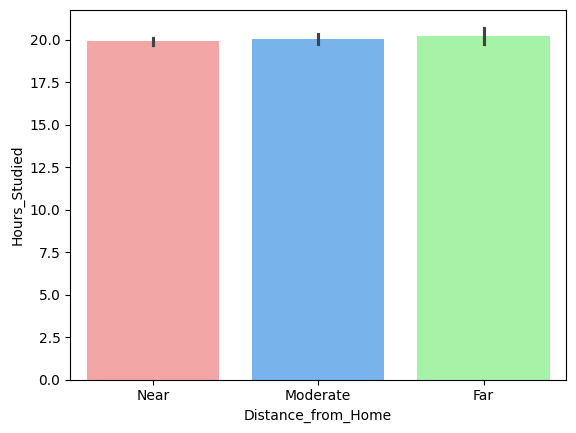

In [218]:
sns.barplot(x='Distance_from_Home', y='Hours_Studied', data=df, palette=colors)

#### Hours_Studied & Parental_Education_Level

In [219]:
colors = ['#ffcc99','#c2c2f0','#ff9999','#66b3ff','#99ff99']  # Customize as needed

<Axes: xlabel='Parental_Education_Level', ylabel='Hours_Studied'>

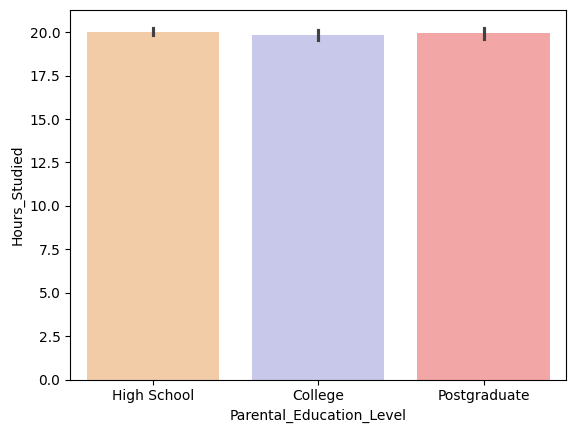

In [220]:
sns.barplot(x='Parental_Education_Level', y='Hours_Studied', data=df, palette=colors)

In [221]:
df.describe(exclude="number")

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6318                6318                       6318   
unique                    3                   3                          2   
top                  Medium              Medium                       True   
freq                   3230                3174                       3774   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6318            6318          6318            6318   
unique                3               2             3               3   
top              Medium            True           Low          Medium   
freq               3203            5839          2557            3795   

       School_Type Peer_Influence Learning_Disabilities  \
count         6318           6318                  6318   
unique           2              3                     2   
top         Public       Positive                 False   
freq          4393           2531                  5659   

       Parental_Education_Level Distance_from_Home Gender  
count                      6318               6318   6318  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3124               3763   3658

#### Hours_Studied & Learning_Disabilities

In [222]:
colors = ["#aa99ff","#2c2c70",'#ff9999','#66b3ff','#99ff99']  # Customize as needed

<Axes: xlabel='Learning_Disabilities', ylabel='Hours_Studied'>

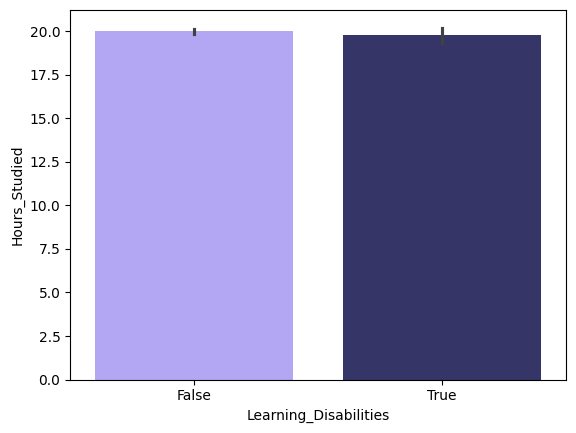

In [223]:
sns.barplot(x='Learning_Disabilities', y='Hours_Studied', data=df, palette=colors)

#### Hours_Studied & Peer_Influence

In [224]:
colors = ["#c62485","#63bbc9","#bf9393",'#66b3ff','#99ff99']  # Customize as needed

<Axes: xlabel='Peer_Influence', ylabel='Hours_Studied'>

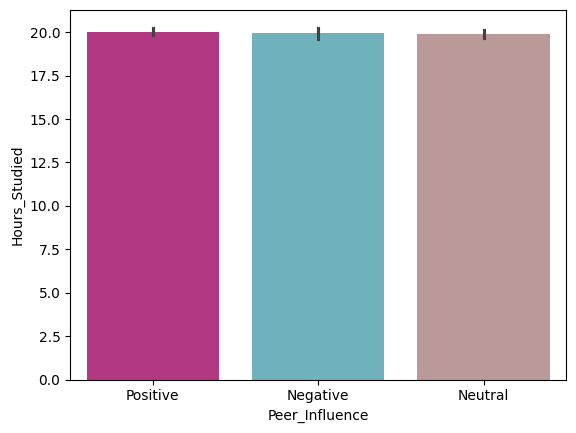

In [225]:
sns.barplot(x='Peer_Influence', y='Hours_Studied', data=df, palette=colors)

In [226]:
df.describe(exclude="number")

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6318                6318                       6318   
unique                    3                   3                          2   
top                  Medium              Medium                       True   
freq                   3230                3174                       3774   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6318            6318          6318            6318   
unique                3               2             3               3   
top              Medium            True           Low          Medium   
freq               3203            5839          2557            3795   

       School_Type Peer_Influence Learning_Disabilities  \
count         6318           6318                  6318   
unique           2              3                     2   
top         Public       Positive                 False   
freq          4393           2531                  5659   

       Parental_Education_Level Distance_from_Home Gender  
count                      6318               6318   6318  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3124               3763   3658

#### Hours_Studied & School_Type

<Axes: xlabel='School_Type', ylabel='Hours_Studied'>

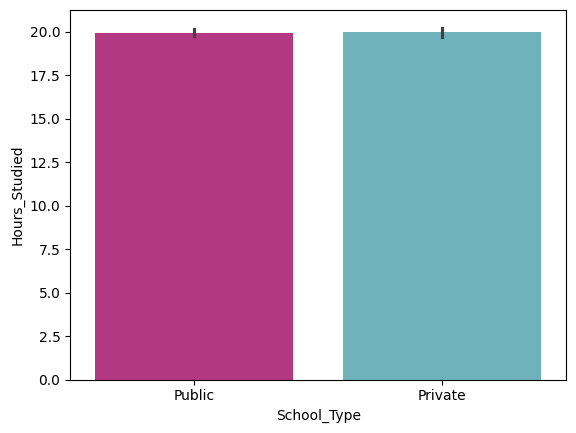

In [229]:
sns.barplot(x='School_Type', y='Hours_Studied', data=df, palette=colors)

In [230]:
df.describe(exclude="number")

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6318                6318                       6318   
unique                    3                   3                          2   
top                  Medium              Medium                       True   
freq                   3230                3174                       3774   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6318            6318          6318            6318   
unique                3               2             3               3   
top              Medium            True           Low          Medium   
freq               3203            5839          2557            3795   

       School_Type Peer_Influence Learning_Disabilities  \
count         6318           6318                  6318   
unique           2              3                     2   
top         Public       Positive                 False   
freq          4393           2531                  5659   

       Parental_Education_Level Distance_from_Home Gender  
count                      6318               6318   6318  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3124               3763   3658

#### Hours_Studied & Teacher_Quality

<Axes: xlabel='Teacher_Quality', ylabel='Hours_Studied'>

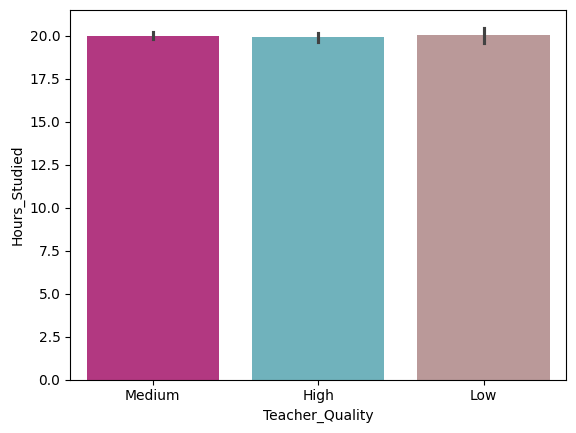

In [231]:
sns.barplot(x='Teacher_Quality', y='Hours_Studied', data=df, palette=colors)

#### Hours_Studied & Family_Income

<Axes: xlabel='Family_Income', ylabel='Hours_Studied'>

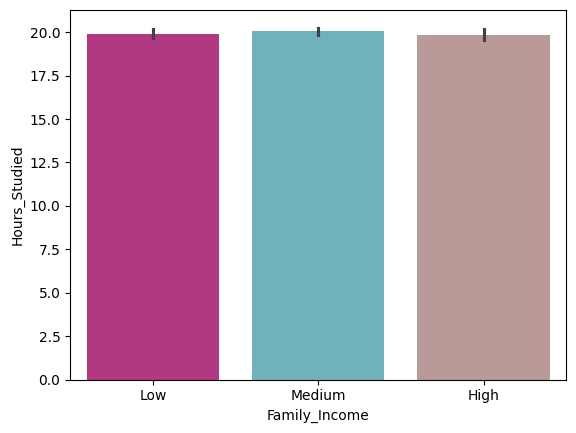

In [232]:
sns.barplot(x='Family_Income', y='Hours_Studied', data=df, palette=colors)

#### Hours_Studied & Internet_Access

<Axes: xlabel='Internet_Access', ylabel='Hours_Studied'>

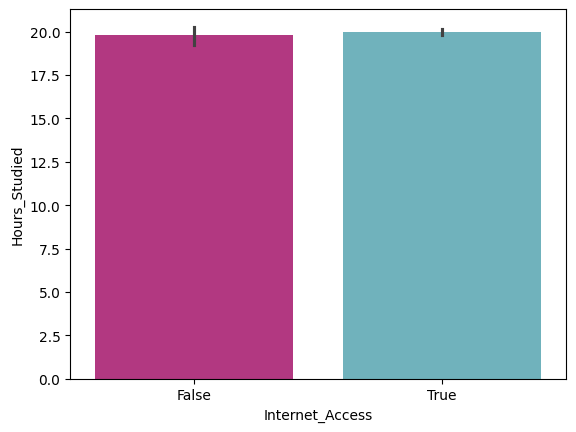

In [233]:
sns.barplot(x='Internet_Access', y='Hours_Studied', data=df, palette=colors)

#### Hours_Studied & Motivation_Level

<Axes: xlabel='Motivation_Level', ylabel='Hours_Studied'>

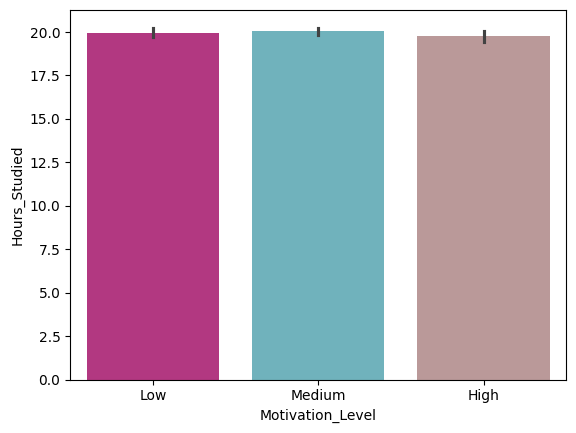

In [234]:
sns.barplot(x='Motivation_Level', y='Hours_Studied', data=df, palette=colors)

#### Hours_Studied & Extracurricular_Activities

<Axes: xlabel='Extracurricular_Activities', ylabel='Hours_Studied'>

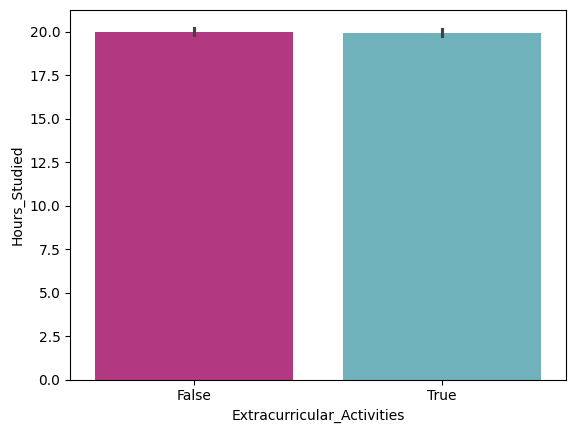

In [235]:
sns.barplot(x='Extracurricular_Activities', y='Hours_Studied', data=df, palette=colors)

#### Hours_Studied & Access_to_Resources

<Axes: xlabel='Access_to_Resources', ylabel='Hours_Studied'>

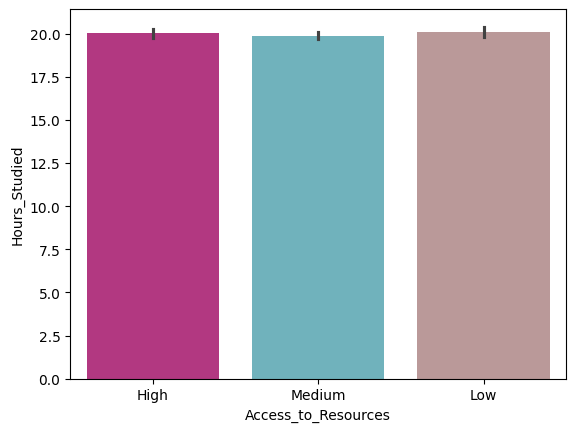

In [236]:
sns.barplot(x='Access_to_Resources', y='Hours_Studied', data=df, palette=colors)

#### Hours_Studied & Parental_Involvement

<Axes: xlabel='Parental_Involvement', ylabel='Hours_Studied'>

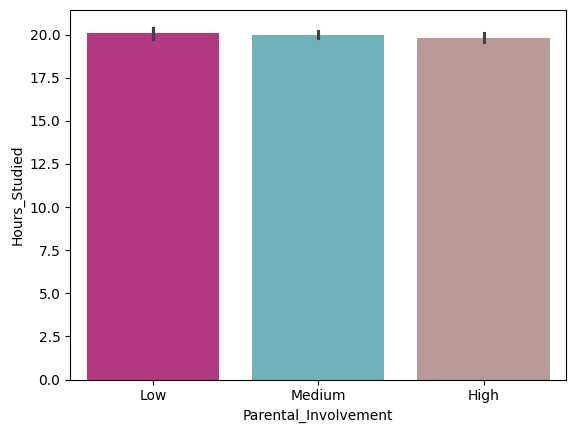

In [237]:
sns.barplot(x='Parental_Involvement', y='Hours_Studied', data=df, palette=colors)

# Data Splitting

In [238]:
X = df["Hours_Studied"]
y = df["Exam_Score"]
X = X.values.reshape(-1, 1)  # Reshape X to be a 2D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Choice and Training

In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
model = LinearRegression()

In [242]:
model.fit(X_train, y_train)

LinearRegression()

In [243]:
y_pred = model.predict(X_test)

# Model Evaluation

In [244]:
from sklearn.metrics import mean_squared_error, r2_score

In [245]:
mse = mean_squared_error(y_test, y_pred)

In [249]:
print("Mean Squared Error:", mse)
print("RMSE:", np.sqrt(mse))

Mean Squared Error: 8.131417876425294
RMSE: 2.8515641105234324


In [247]:
r2_score = r2_score(y_test, y_pred)

In [248]:
print("r2 Score:", r2_score)

r2 Score: 0.23741737151291342


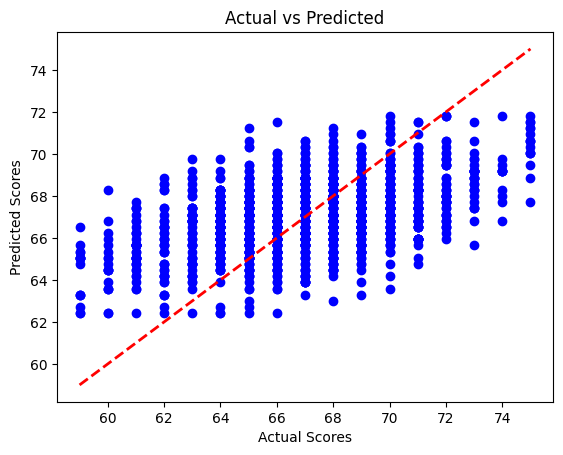

In [250]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted')
plt.show()

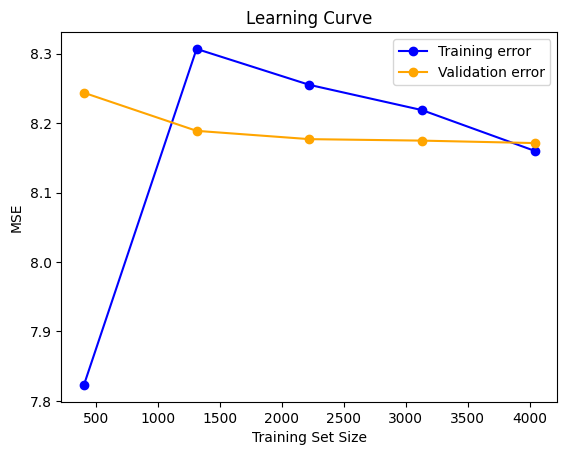

In [251]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X_train, y_train, cv=5,
    scoring='neg_mean_squared_error'
)

# Convert to positive MSE
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


# Polynomial Regression Model

In [253]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [254]:
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # degree=2 means quadratic
    ('linear', LinearRegression())
])

In [255]:
poly_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())])

In [256]:
y_pred2 = poly_model.predict(X_test)

In [262]:
mse2 = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error (Polynomial Regression):", mse2)

Mean Squared Error (Polynomial Regression): 8.13547154838007


In [263]:
print("Root Mean Squared Error (Polynomial Regression):", np.sqrt(mse2))

Root Mean Squared Error (Polynomial Regression): 2.8522748023954616


In [267]:
from sklearn.metrics import r2_score as r2_score_func

r2 = r2_score_func(y_test, y_pred2)
print("r2 Score (Polynomial Regression):", r2)



r2 Score (Polynomial Regression): 0.23703720905400716


# Models Comparisons

In [268]:
print("Linear Regression:  R² =", r2_score, "  RMSE =", np.sqrt(mse))
print("Polynomial Regression:  R² =", r2, "  RMSE =", np.sqrt(mse2))

Linear Regression:  R² = 0.23741737151291342   RMSE = 2.8522748023954616
Polynomial Regression:  R² = 0.23703720905400716   RMSE = 2.8522748023954616


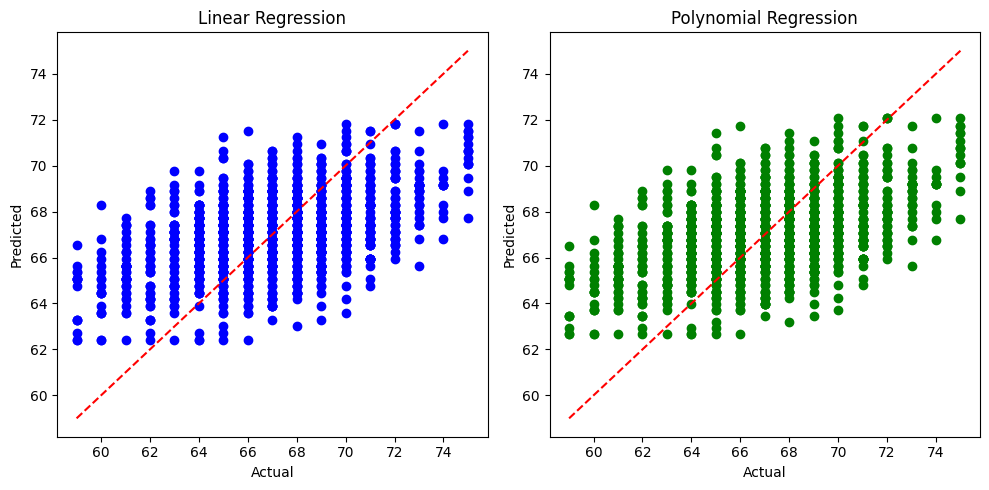

In [269]:
plt.figure(figsize=(10,5))

# Linear
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Polynomial
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred2, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Polynomial Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


# Another Splitting Plan

In [270]:
df.describe(include="number")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6318.000000  6318.000000  6318.000000      6318.000000   
mean       19.964387    79.997784     7.037195        75.030231   
std         5.939607    11.545986     1.466974        14.390554   
min         4.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        36.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6318.000000        6318.000000  6318.000000  
mean            1.689142           2.971668    67.081988  
std             0.917481           1.027093     3.330450  
min             1.000000           0.000000    59.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             4.000000           6.000000    75.000000

In [271]:
X = df[['Hours_Studied','Attendance','Previous_Scores', 'Tutoring_Sessions','Physical_Activity']]
y = df['Exam_Score']

In [272]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LinearRegression with new features

In [273]:
model.fit(X_train, y_train)

LinearRegression()

In [283]:
y_pred_l = model.predict(X_test)

In [284]:
print("root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred_l)))

root mean squared error: 1.474594107425699


In [285]:
print("r2 Score:", r2_score_func(y_test, y_pred_l)*100)

r2 Score: 79.6077279708263


# Polynomial Regression Model

In [281]:

poly_model_new = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

# Fit model
poly_model_new.fit(X_train, y_train)

# Predict
y_pred_p = poly_model.predict(X_test)


In [282]:
print("root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred_p)))
print("r2 Score:", r2_score_func(y_test, y_pred_p)*100)

root mean squared error: 1.4790041191909098
r2 Score: 79.485572817153


# Models Comparison Before and After Adding features 

## Before

In [289]:
print("Linear Regression:  R² =", r2_score*100, "  RMSE =", np.sqrt(mse))
print("Polynomial Regression:  R² =", r2*100, "  RMSE =", np.sqrt(mse2))

Linear Regression:  R² = 23.741737151291343   RMSE = 2.8522748023954616
Polynomial Regression:  R² = 23.703720905400715   RMSE = 2.8522748023954616


## After

In [288]:
print("Linean Regression:  R² =", r2_score_func(y_test, y_pred_l)*100, "  RMSE =", np.sqrt(mean_squared_error(y_test, y_pred_l)))
print("Polynomial Regression:  R² =", r2_score_func(y_test, y_pred_p)*100, "  RMSE =", np.sqrt(mean_squared_error(y_test, y_pred_p)))

Linean Regression:  R² = 79.6077279708263   RMSE = 1.474594107425699
Polynomial Regression:  R² = 79.485572817153   RMSE = 1.4790041191909098
